# Part 1 - Analytics:

### 1- Importing Everything:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the excel file
df = pd.read_excel(r'DataScientistTask_Dataset.xlsx')

### 2- Understanding and Cleaning the data:

- Size and shape of data

In [3]:
# Size of the data
rows, cols = df.shape
print(f"We have {rows} rows and {cols} columns in our dataset.")

We have 9206 rows and 15 columns in our dataset.


In [4]:
# A sample of the data
df.head()

WellID      BVHH FormationAlias       NioGOR      CodGOR  LateralLength  \
0  500109742  1.105028       NIOBRARA  1687.414535         NaN         8084.0   
1  500109753  0.644480       NIOBRARA  2267.667384         NaN         3912.0   
2  500109754  0.620268       NIOBRARA  2368.236087         NaN         4137.0   
3  500109760  0.649670       NIOBRARA   333.876618         NaN         4161.0   
4  500109772  1.423475       NIOBRARA  3608.065949  3199.96293         4418.0   

   ProppantPerFoot  FluidPerFoot  LeftDistance LeftNeighbourType  \
0      1256.308758   1234.370856           NaN       NoNeighbour   
1       742.842536    784.000000           NaN       NoNeighbour   
2       912.738700   1127.047136        1330.0       Codeveloped   
3       914.683970    691.026676           NaN       NoNeighbour   
4       747.271842    928.239928           NaN       NoNeighbour   

   RightDistance RightNeighbourType     TVD  NormalizedOilEUR  \
0            NaN        NoNeighbour  7501.0         15.234785   
1         1330.0        Codeveloped  7551.0          5.327198   
2            NaN        NoNeighbour  7594.0          5.629925   
3            NaN        NoNeighbour  7391.0          8.240087   
4            NaN        NoNeighbour  7838.0         15.374830   

   NormalizedGasEUR  
0         37.674048  
1         11.627301  
2         14.544356  
3          7.012257  
4         51.169534

In [5]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)
# checking if the column name has any extra spaces 

Numerical columns: 
 Index(['WellID', 'BVHH', 'NioGOR', 'CodGOR', 'LateralLength',
       'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'RightDistance',
       'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR'],
      dtype='object')
Categorical columns: 
 Index(['FormationAlias', 'LeftNeighbourType', 'RightNeighbourType'], dtype='object')


- WellID in the well IDdentifier serial number which consist of state next to region number so will ignore it .

- Missing Values:

In [6]:
# Count of Null values by feature
df.isnull().sum()

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64

In [7]:
df.loc[:,"LeftDistance"].isnull().sum()*100/len(df)

26.591353465131437

It seems that we have **2448** missing values in the `LeftDistance` column. As this is **26.5%** of the data we have, we can not drop it now as it has a very small impact.

- first BVHH can now fill null values with mean as aproxamation value but in real case i suggest to take mean of neighbour well rock quality .

In [12]:
df['BVHH'].fillna(int(df['BVHH'].mean()), inplace=True)

- as I search and understand for NioGOR and CodGOR features it represent the layer of earth so it can may be not found to we can not fill null values with mean I preffer the replace with 0 .

In [13]:
df['NioGOR'].fillna(0, inplace=True)

In [14]:
df['CodGOR'].fillna(0, inplace=True)

- ProppantPerFoot and FluidPerFoot can fill null values with mean .

In [15]:
df['ProppantPerFoot'].fillna(int(df['ProppantPerFoot'].mean()), inplace=True)

In [16]:
df['FluidPerFoot'].fillna(int(df['FluidPerFoot'].mean()), inplace=True)

- LeftDistance and RightDistance can not fill null values with mean the right way to represent distance with zero when NoNeighbour one otherwise.

In [17]:
 df['LeftDistance'] = df.apply(
            lambda row: 0 if row['LeftNeighbourType'] == 'NoNeighbour' else 1,
            axis=1
        )

In [18]:
 df['RightDistance'] = df.apply(
            lambda row: 0 if row['RightNeighbourType'] == 'NoNeighbour' else 1,
            axis=1
        )

In [19]:
df.loc[:,"TVD"].isnull().sum()*100/len(df)

3.3999565500760376

It seems that we have **313** missing values in the `number_of_impressions` column. As this is **3.4%** of the data we have, we can drop it now as it has a very small impact.

In [20]:
df = df.dropna(how='any',axis=0) 

In [21]:
print(df.isna().sum())
print(df.shape)

WellID                0
BVHH                  0
FormationAlias        0
NioGOR                0
CodGOR                0
LateralLength         0
ProppantPerFoot       0
FluidPerFoot          0
LeftDistance          0
LeftNeighbourType     0
RightDistance         0
RightNeighbourType    0
TVD                   0
NormalizedOilEUR      0
NormalizedGasEUR      0
dtype: int64
(8893, 15)


- handle Categorical columns

In [22]:
df["FormationAlias"].unique()

array(['NIOBRARA', 'CODELL'], dtype=object)

In [23]:
df["LeftNeighbourType"].unique()

array(['NoNeighbour', 'Codeveloped', 'Parent'], dtype=object)

In [24]:
df["RightNeighbourType"].unique()

array(['NoNeighbour', 'Codeveloped', 'Parent'], dtype=object)

In [25]:
# Import label encoder 
# label_encoder object knows how to understand word labels. 
FormationAlias_label_encoder = preprocessing.LabelEncoder() 
NeighbourType_label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'FormationAlias , LeftNeighbourType , RightNeighbourType'. 
df['FormationAlias']= FormationAlias_label_encoder.fit_transform(df['FormationAlias'])
df['LeftNeighbourType']= NeighbourType_label_encoder.fit_transform(df['LeftNeighbourType'])
df['RightNeighbourType']= NeighbourType_label_encoder.fit_transform(df['RightNeighbourType'])
  
df.head()

WellID      BVHH  FormationAlias       NioGOR      CodGOR  \
0  500109742  1.105028               1  1687.414535     0.00000   
1  500109753  0.644480               1  2267.667384     0.00000   
2  500109754  0.620268               1  2368.236087     0.00000   
3  500109760  0.649670               1   333.876618     0.00000   
4  500109772  1.423475               1  3608.065949  3199.96293   

   LateralLength  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0         8084.0      1256.308758   1234.370856             0   
1         3912.0       742.842536    784.000000             0   
2         4137.0       912.738700   1127.047136             1   
3         4161.0       914.683970    691.026676             0   
4         4418.0       747.271842    928.239928             0   

   LeftNeighbourType  RightDistance  RightNeighbourType     TVD  \
0                  1              0                   1  7501.0   
1                  1              1                   0  7551.0   
2                  0              0                   1  7594.0   
3                  1              0                   1  7391.0   
4                  1              0                   1  7838.0   

   NormalizedOilEUR  NormalizedGasEUR  
0         15.234785         37.674048  
1          5.327198         11.627301  
2          5.629925         14.544356  
3          8.240087          7.012257  
4         15.374830         51.169534

In [8]:
# # We have enough points, so we can drop the null values from this dataset.
- first BVHH can now fill null values with mean as aproxamation value but in real case i suggest to take mean of neighbour well rock quality .

df['BVHH'].fillna(int(df['BVHH'].mean()), inplace=True)

- as I search and understand for NioGOR and CodGOR features it represent the layer of earth so it can may be not found to we can not fill null values with mean I preffer the replace with 0 .

df['NioGOR'].fillna(0, inplace=True)

df['CodGOR'].fillna(0, inplace=True)

- ProppantPerFoot and FluidPerFoot can fill null values with mean .

df['ProppantPerFoot'].fillna(int(df['ProppantPerFoot'].mean()), inplace=True)

df['FluidPerFoot'].fillna(int(df['FluidPerFoot'].mean()), inplace=True)

- LeftDistance and RightDistance can not fill null values with mean the right way to represent distance with zero when NoNeighbour one otherwise.

 df['LeftDistance'] = df.apply(
            lambda row: 0 if row['LeftNeighbourType'] == 'NoNeighbour' else 1,
            axis=1
        )

 df['RightDistance'] = df.apply(
            lambda row: 0 if row['RightNeighbourType'] == 'NoNeighbour' else 1,
            axis=1
        )

df.loc[:,"TVD"].isnull().sum()*100/len(df)

It seems that we have **313** missing values in the `number_of_impressions` column. As this is **3.4%** of the data we have, we can drop it now as it has a very small impact.

df = df.dropna(how='any',axis=0) 

print(df.isna().sum())
print(df.shape)

- handle Categorical columns

df["FormationAlias"].unique()

df["LeftNeighbourType"].unique()

df["RightNeighbourType"].unique()

# Import label encoder 
# label_encoder object knows how to understand word labels. 
FormationAlias_label_encoder = preprocessing.LabelEncoder() 
NeighbourType_label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'FormationAlias , LeftNeighbourType , RightNeighbourType'. 
df['FormationAlias']= FormationAlias_label_encoder.fit_transform(df['FormationAlias'])
df['LeftNeighbourType']= NeighbourType_label_encoder.fit_transform(df['LeftNeighbourType'])
df['RightNeighbourType']= NeighbourType_label_encoder.fit_transform(df['RightNeighbourType'])
  
df.head() df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)
# print(df.shape) # After removing null values

- Duplicate records:

In [9]:
dup = df.duplicated().sum()
print(f"We have {dup} values.")

We have 0 values.


- Data Types:

In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              9206 non-null   int64  
 1   BVHH                7565 non-null   float64
 2   FormationAlias      9206 non-null   object 
 3   NioGOR              8709 non-null   float64
 4   CodGOR              7538 non-null   float64
 5   LateralLength       9206 non-null   float64
 6   ProppantPerFoot     8974 non-null   float64
 7   FluidPerFoot        8942 non-null   float64
 8   LeftDistance        6758 non-null   float64
 9   LeftNeighbourType   9206 non-null   object 
 10  RightDistance       6778 non-null   float64
 11  RightNeighbourType  9206 non-null   object 
 12  TVD                 8893 non-null   float64
 13  NormalizedOilEUR    9206 non-null   float64
 14  NormalizedGasEUR    9206 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.1+ 

It seems that we need to change the data types for:
- `FormationAlias` from *object* to *category*
- `LeftNeighbourType` from *object* to *category*
- `RightNeighbourType` from *object* to *category*

In [11]:
#It seems that we need to change some columns data types
df.loc[:,"FormationAlias"] = df.loc[:,"FormationAlias"].astype("category")
df.loc[:,"LeftNeighbourType"] = df.loc[:,"LeftNeighbourType"].astype("category")
df.loc[:,"RightNeighbourType"] = df.loc[:,"RightNeighbourType"].astype("category")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   WellID              9206 non-null   int64   
 1   BVHH                7565 non-null   float64 
 2   FormationAlias      9206 non-null   category
 3   NioGOR              8709 non-null   float64 
 4   CodGOR              7538 non-null   float64 
 5   LateralLength       9206 non-null   float64 
 6   ProppantPerFoot     8974 non-null   float64 
 7   FluidPerFoot        8942 non-null   float64 
 8   LeftDistance        6758 non-null   float64 
 9   LeftNeighbourType   9206 non-null   category
 10  RightDistance       6778 non-null   float64 
 11  RightNeighbourType  9206 non-null   category
 12  TVD                 8893 non-null   float64 
 13  NormalizedOilEUR    9206 non-null   float64 
 14  NormalizedGasEUR    9206 non-null   float64 
dtypes: category(3), float64(11), int64(1)


### What is the structure of the dataset?

> - The dataset consists of a the well’s lifetime certain features which available at the time of drilling . We'll look into to capture complex relationships between the features and the targets and feature interactions’ effect on the targets.
> - It has **9206 rows** and **15 columns**. 

Each post includes:
 - WellID                 
 - BVHH               
 - FormationAlias      
 - NioGOR              
 - CodGOR              
 - LateralLength       
 - ProppantPerFoot     
 - FluidPerFoot        
 - LeftDistance        
 - LeftNeighbourType    
 - RightDistance       
 - RightNeighbourType   
 - TVD                 
 - NormalizedOilEUR    
 - NormalizedGasEUR  

### What is the main feature of interest in the dataset?

> The main feature of interest is the `NormalizedOilEUR` and `NormalizedGasEUR` features and we'll look into it and its relationship with other features as well

### What features in the dataset do you think will help support your investigation into your features of interest?

> - I think the BVHH , FormationAlias , NioGOR , CodGOR , LateralLength , TVD , ProppantPerFoot and FluidPerFoot all are main factors for a both of the NormalizedOilEUR and NormalizedGasEUR amount.
> - I'll start with Univariate Analysis to understand the distribution of each feature and understand its statistics.
> - Then, I'll do Bivariate Analysis to investigate the relationship between each feature and the ` NormalizedOilEUR `and` NormalizedGasEUR` amount.
> -  With no clear relationship, I used the OLS regression model to determine the effect of each feature based on Coefficient term.
- **Note**: I tried other communications of linear and non-linear like log, ln, polynomial and exponential but we ended up will these relations and I prefer to use the OLS regression model due to the little impact of features. 


## 3- Univariate Data Analysis:

#### Let's scale  the whole numerical feature with `MinMax Scaler`

In [12]:
features = df[num_col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_col] = scaler.fit_transform(features.values)

In [13]:
df.describe()

WellID         BVHH       NioGOR       CodGOR  LateralLength  \
count  9206.000000  7565.000000  8709.000000  7538.000000    9206.000000   
mean      0.049579     0.484783     0.012895     0.150170       0.349773   
std       0.211159     0.155441     0.035170     0.127893       0.179107   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.002778     0.367180     0.005880     0.076479       0.174198   
50%       0.002779     0.480362     0.009397     0.118726       0.329571   
75%       0.002780     0.601805     0.013457     0.180401       0.525692   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       ProppantPerFoot  FluidPerFoot  LeftDistance  RightDistance  \
count      8974.000000   8942.000000   6758.000000    6778.000000   
mean          0.099200      0.051464      0.161722       0.164190   
std           0.051849      0.031280      0.175880       0.180093   
min           0.000000      0.000000      0.000000       0.000000   
25%           0.070983      0.034960      0.062536       0.062714   
50%           0.090377      0.042851      0.109485       0.109654   
75%           0.112871      0.059998      0.168742       0.168947   
max           1.000000      1.000000      1.000000       1.000000   

               TVD  NormalizedOilEUR  NormalizedGasEUR  
count  8893.000000       9206.000000       9206.000000  
mean      0.613106          0.196308          0.227117  
std       0.085866          0.084440          0.142160  
min       0.000000          0.000000          0.000000  
25%       0.566616          0.140741          0.110200  
50%       0.619658          0.182783          0.208875  
75%       0.659474          0.237424          0.324398  
max       1.000000          1.000000          1.000000

In [14]:
## define functions to clean outlier 
def outlier_clean(col_name):
    Q3 = df[col_name].quantile(.75)
    Q1 = df[col_name].quantile(.25)
    IQR  = Q3 - Q1 
    highboundary = Q3 + 1.5*IQR
    lowboundary = Q1 - 1.5*IQR
    df[col_name] = df[col_name][df[col_name].between(lowboundary, highboundary)] 

In [15]:
# Let's check the distribution of y variable (NormalizedOilEUR)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['NormalizedOilEUR'])
plt.title('Normalized Oil EUR Box Plot')
plt.show()

In [16]:
# Let's check the distribution of y variable (NormalizedGasEUR)
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['NormalizedGasEUR'])
plt.title('Normalized Oil EUR Box Plot')
plt.show()

In [17]:
# without outliers
outlier_clean("NormalizedOilEUR")
outlier_clean("NormalizedGasEUR")

In [18]:
sns.distplot(df.NormalizedOilEUR)

<AxesSubplot:xlabel='NormalizedOilEUR', ylabel='Density'>

In [19]:
sns.distplot(df.NormalizedGasEUR)

<AxesSubplot:xlabel='NormalizedGasEUR', ylabel='Density'>

#### Let's understand the `BVHH` feature:

In [20]:
df.describe().BVHH

count    7565.000000
mean        0.484783
std         0.155441
min         0.000000
25%         0.367180
50%         0.480362
75%         0.601805
max         1.000000
Name: BVHH, dtype: float64

<AxesSubplot:xlabel='BVHH'>

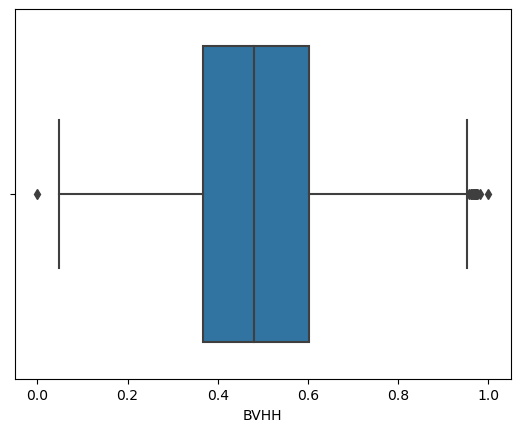

In [21]:
sns.boxplot(df.BVHH)

<AxesSubplot:xlabel='BVHH', ylabel='Density'>

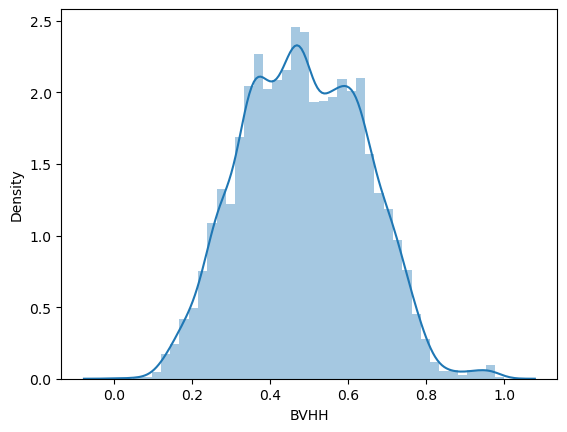

In [22]:
sns.distplot(df.BVHH)

In [23]:
# without outliers
outlier_clean("BVHH")

<AxesSubplot:xlabel='BVHH', ylabel='NormalizedOilEUR'>

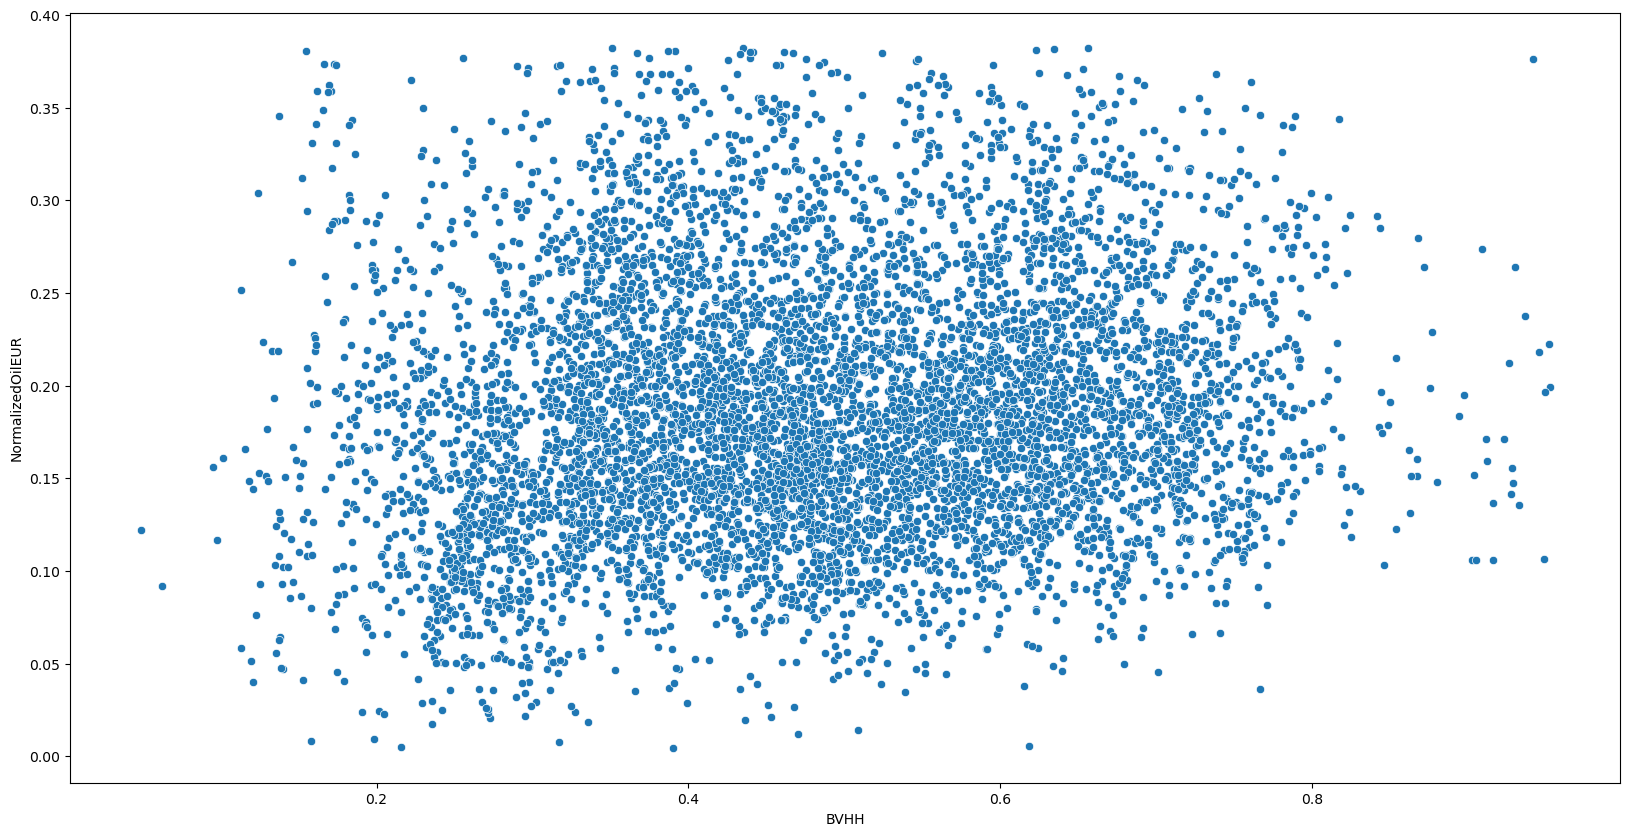

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="BVHH", y="NormalizedOilEUR", data=df)

<AxesSubplot:xlabel='BVHH', ylabel='NormalizedGasEUR'>

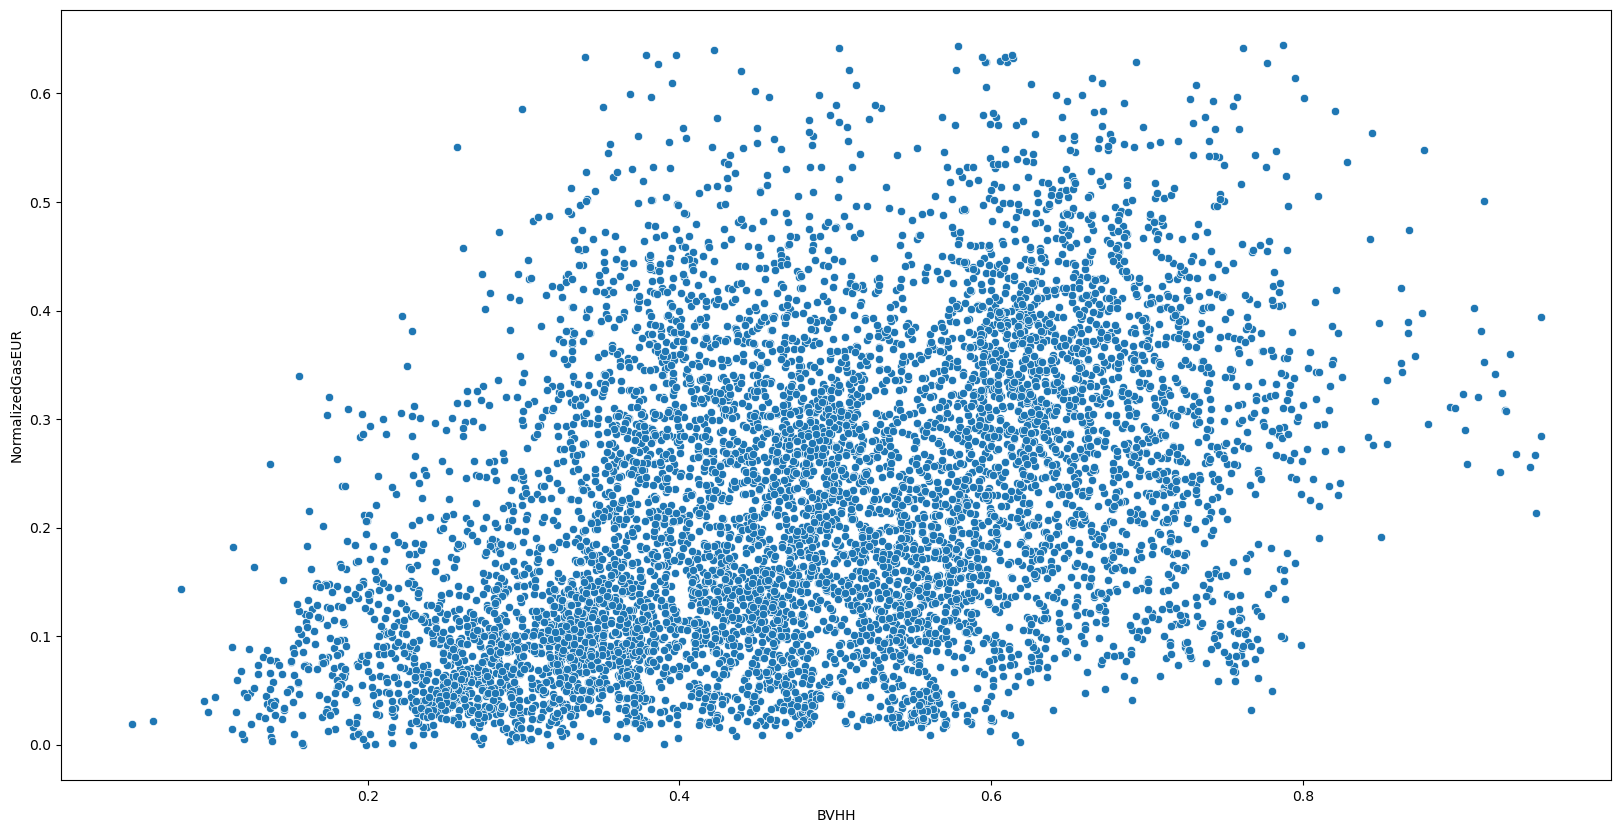

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='BVHH', y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between BVHH and the NormalizedOilEUR but has a **postive** correlation between BVHH and NormalizedGasEUR . 

#### Let's understand the `NioGOR` feature:

In [26]:
df.describe().NioGOR

count    8709.000000
mean        0.012895
std         0.035170
min         0.000000
25%         0.005880
50%         0.009397
75%         0.013457
max         1.000000
Name: NioGOR, dtype: float64

In [27]:
sns.boxplot(df.NioGOR)

<AxesSubplot:xlabel='NioGOR'>

In [28]:
sns.distplot(df.NioGOR)

<AxesSubplot:xlabel='NioGOR', ylabel='Density'>

In [29]:
# without outliers
outlier_clean("NioGOR")

<AxesSubplot:xlabel='NioGOR', ylabel='NormalizedOilEUR'>

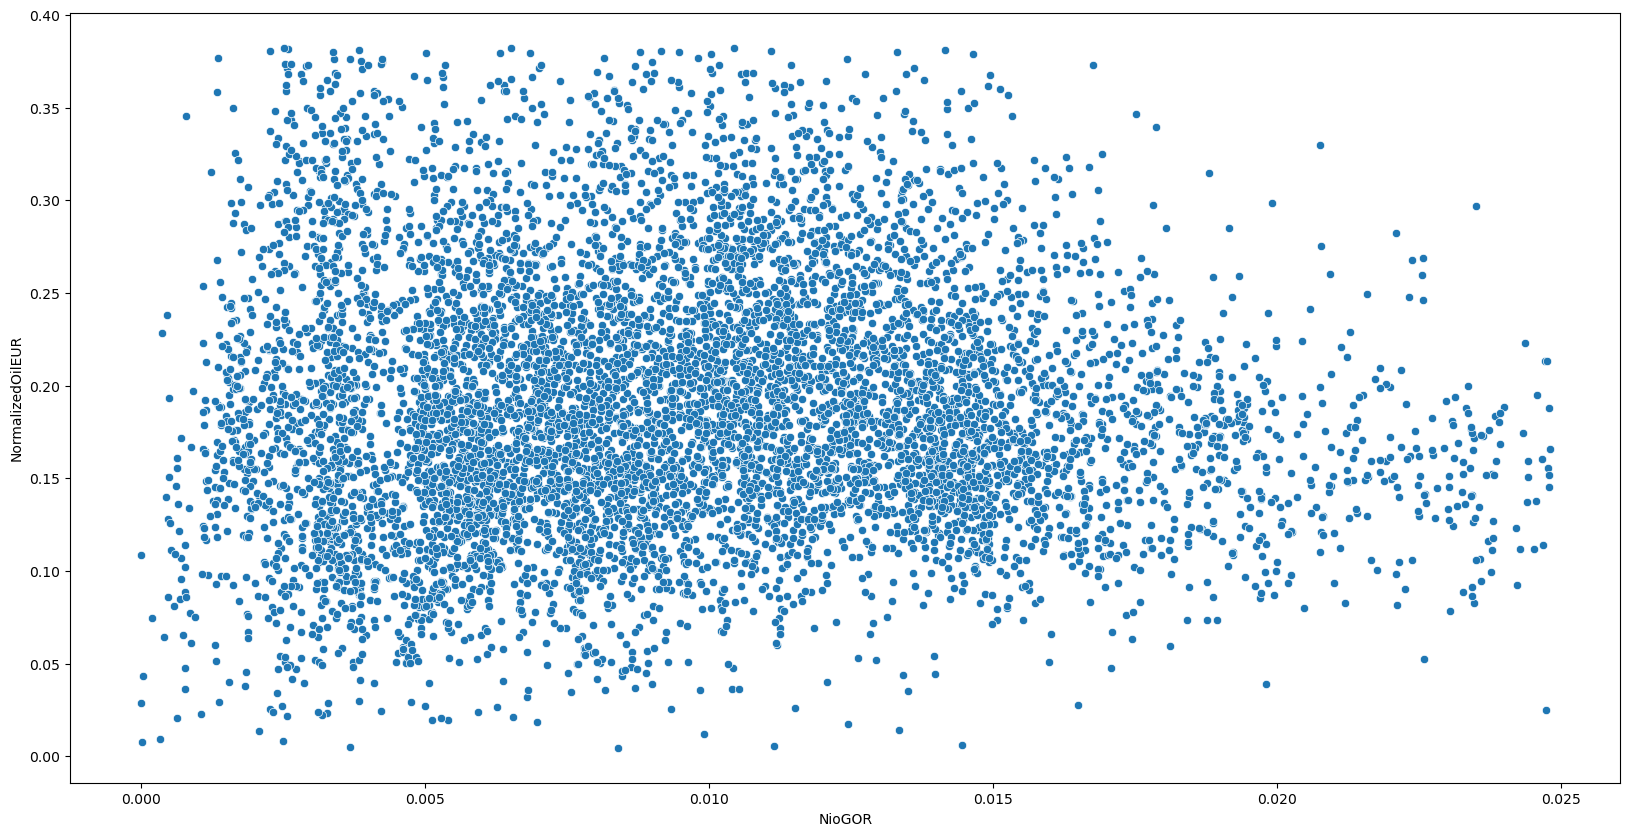

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="NioGOR", y="NormalizedOilEUR", data=df)

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="NioGOR", y="NormalizedGasEUR", data=df)

<AxesSubplot:xlabel='NioGOR', ylabel='NormalizedGasEUR'>

- there is **no effect** correlation between NioGOR and the NormalizedOilEUR but has a **postive** correlation between NioGOR and NormalizedGasEUR . 

#### Let's understand the `CodGOR` feature:

In [32]:
df.describe().CodGOR

count    7538.000000
mean        0.150170
std         0.127893
min         0.000000
25%         0.076479
50%         0.118726
75%         0.180401
max         1.000000
Name: CodGOR, dtype: float64

In [33]:
sns.boxplot(df.CodGOR)

<AxesSubplot:xlabel='CodGOR'>

<AxesSubplot:xlabel='CodGOR', ylabel='Density'>

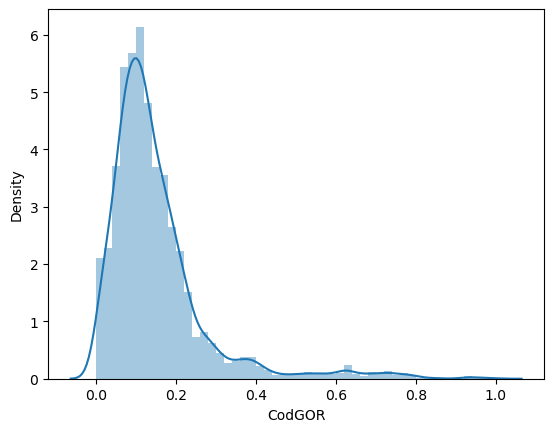

In [34]:
sns.distplot(df.CodGOR)

In [35]:
# without outliers
outlier_clean("CodGOR")

<AxesSubplot:xlabel='CodGOR', ylabel='NormalizedOilEUR'>

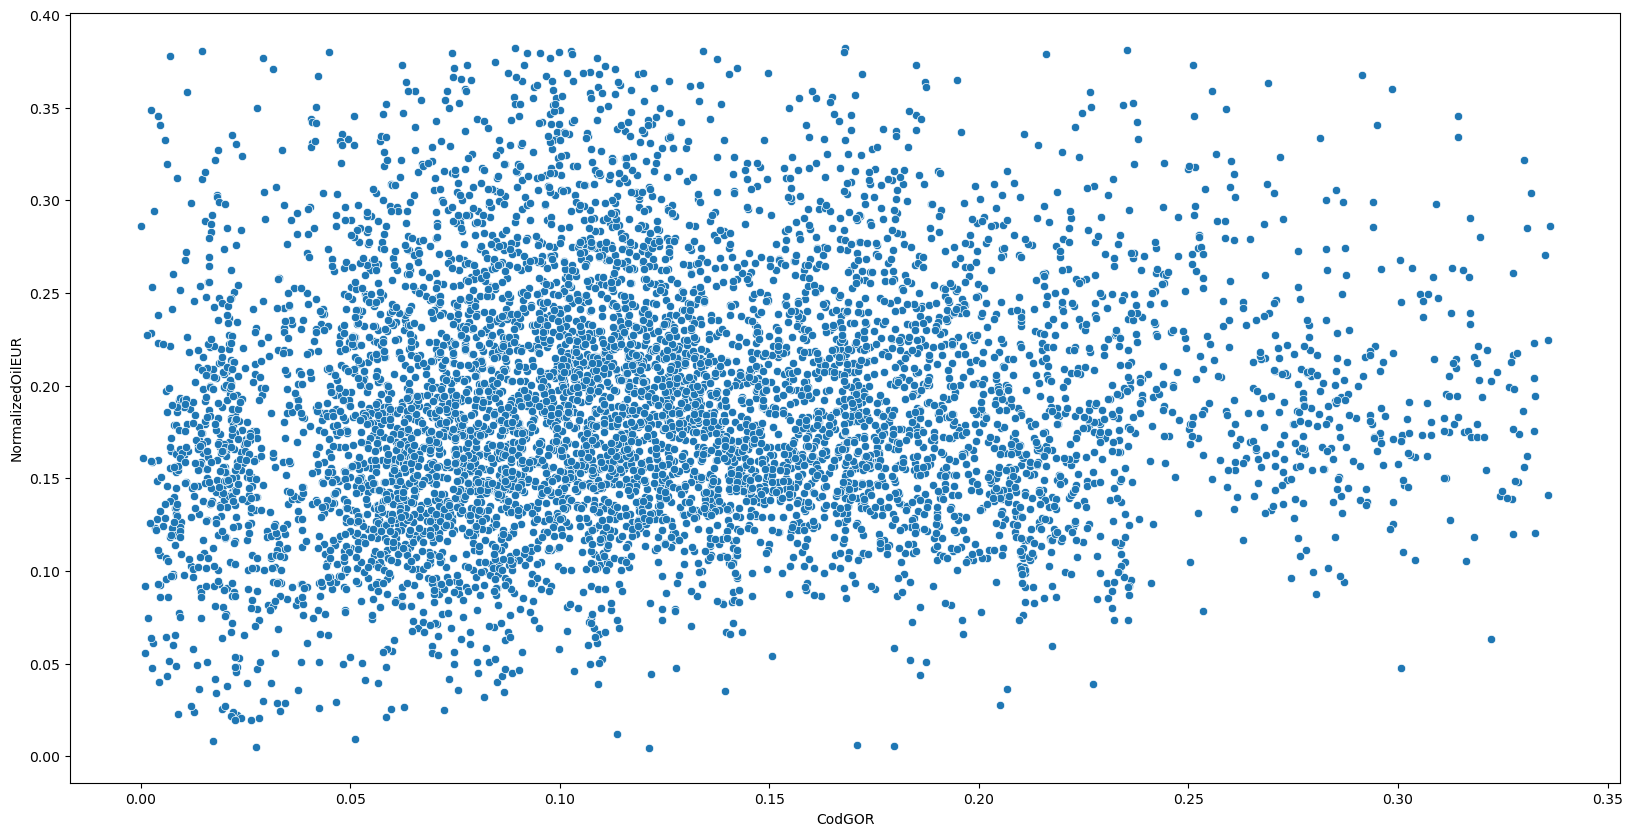

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="CodGOR", y="NormalizedOilEUR", data=df)

<AxesSubplot:xlabel='CodGOR', ylabel='NormalizedGasEUR'>

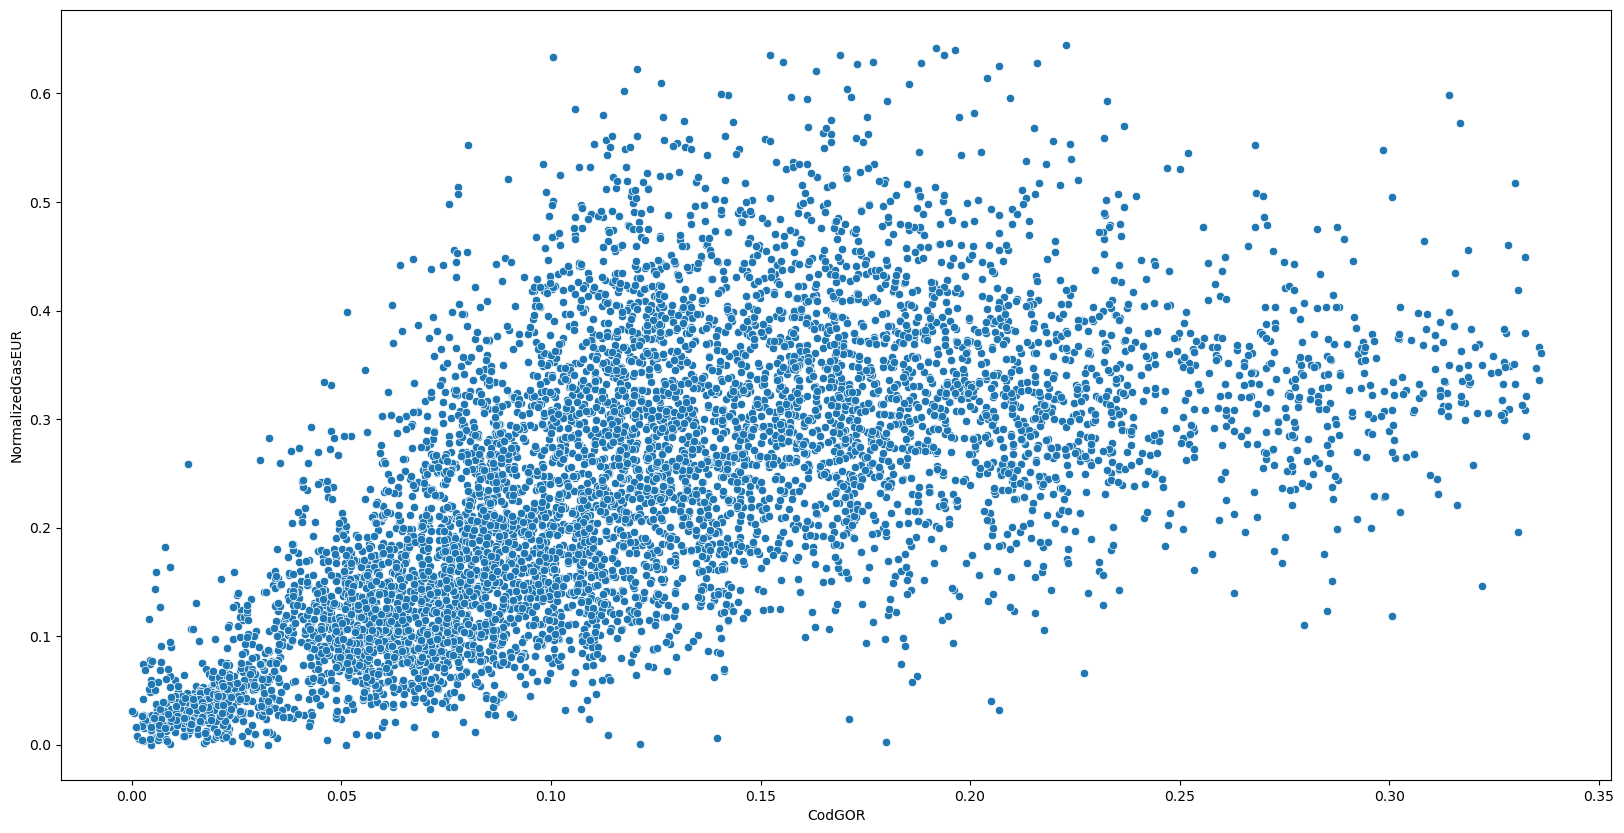

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="CodGOR", y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between CodGOR and the NormalizedOilEUR but has a **postive** correlation between CodGOR and NormalizedGasEUR . 

#### Let's understand the `LateralLength` feature:

In [38]:
df.describe().LateralLength

count    9206.000000
mean        0.349773
std         0.179107
min         0.000000
25%         0.174198
50%         0.329571
75%         0.525692
max         1.000000
Name: LateralLength, dtype: float64

<AxesSubplot:xlabel='LateralLength'>

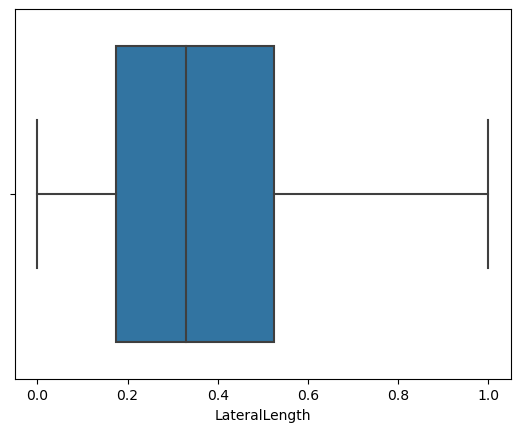

In [39]:
sns.boxplot(df.LateralLength)

<AxesSubplot:xlabel='LateralLength', ylabel='Density'>

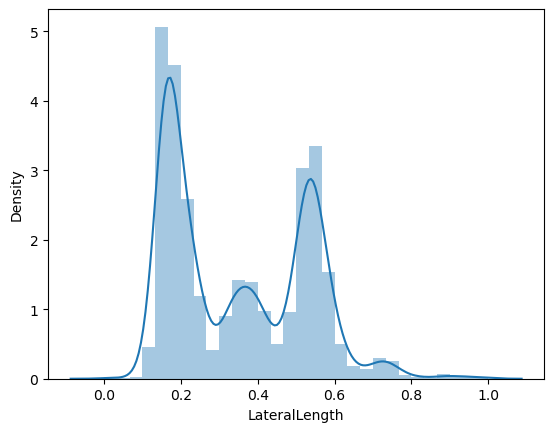

In [40]:
sns.distplot(df.LateralLength)

In [41]:
# without outliers
# outlier_clean("LateralLength")

<AxesSubplot:xlabel='LateralLength', ylabel='NormalizedOilEUR'>

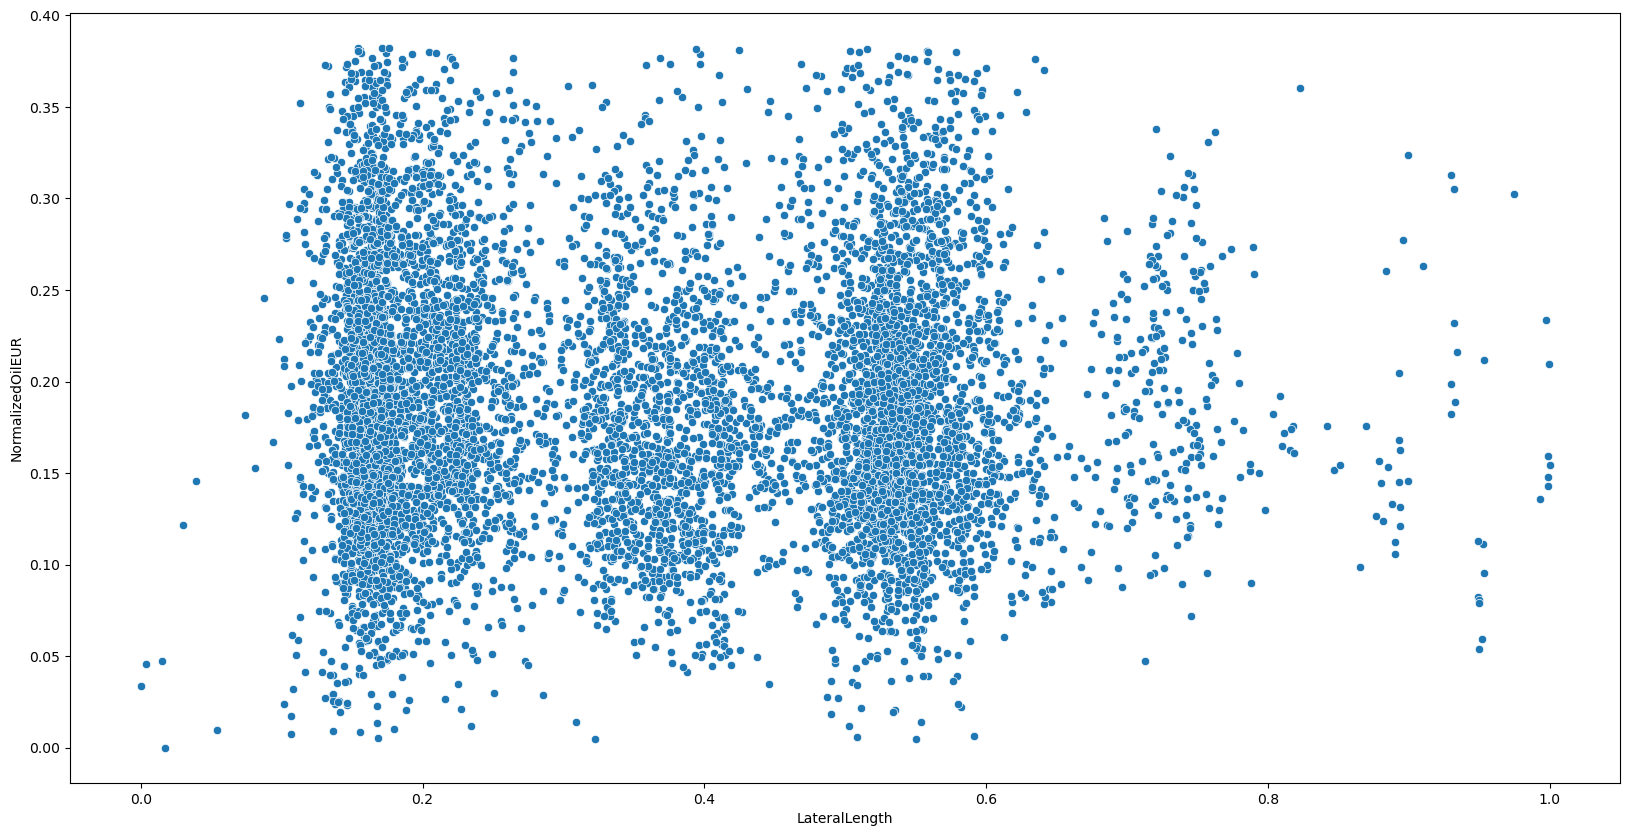

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="LateralLength", y="NormalizedOilEUR", data=df)

<AxesSubplot:xlabel='LateralLength', ylabel='NormalizedGasEUR'>

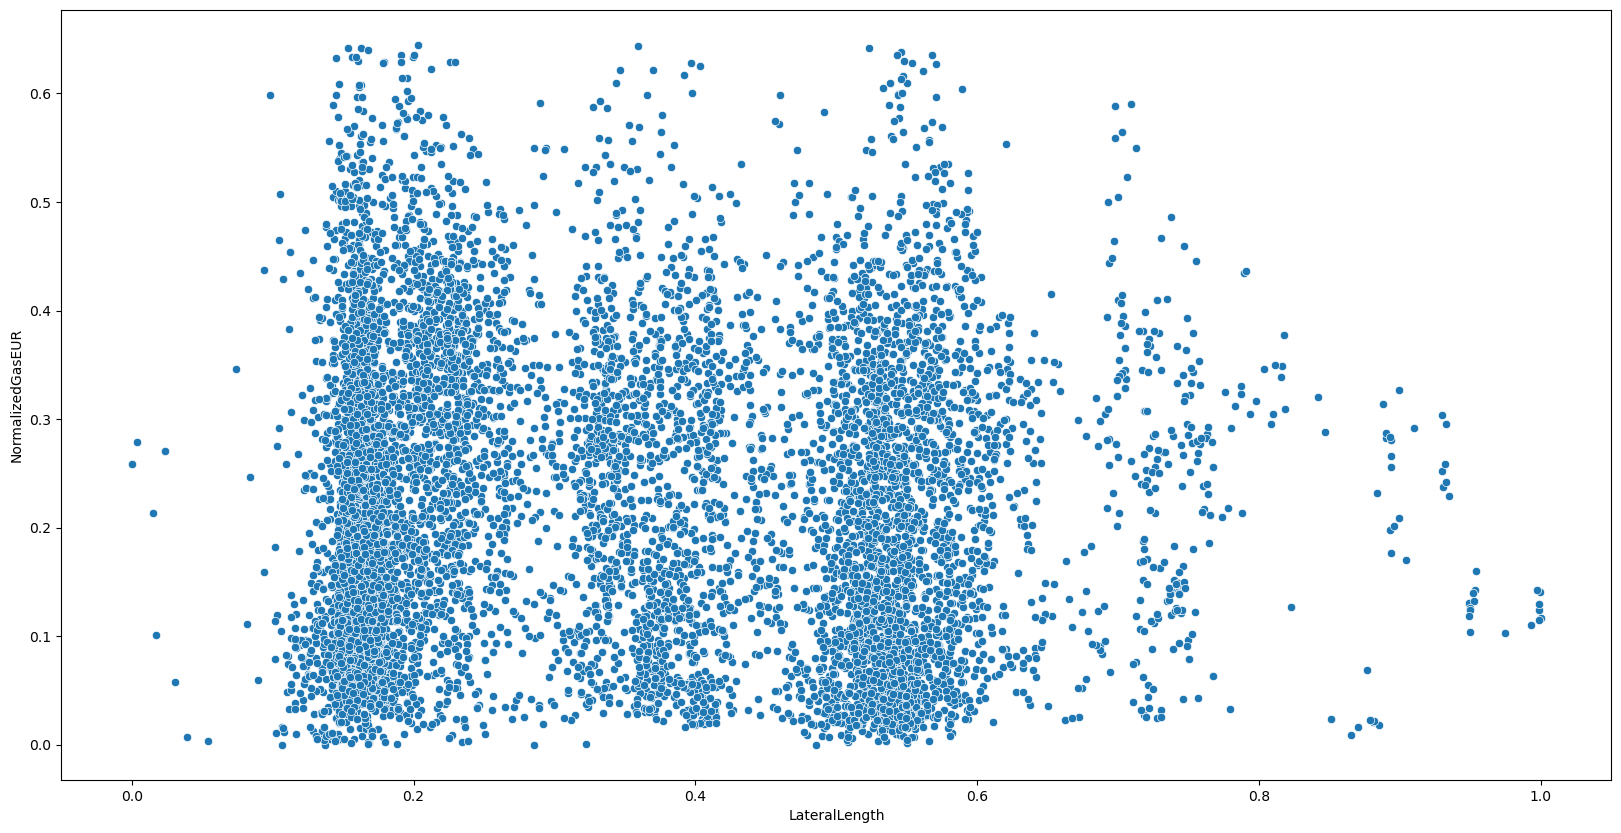

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="LateralLength", y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between LateralLength and the NormalizedOilEURor with NormalizedGasEUR . 

#### Let's understand the `ProppantPerFoot` feature:

In [44]:
df.describe().ProppantPerFoot

count    8974.000000
mean        0.099200
std         0.051849
min         0.000000
25%         0.070983
50%         0.090377
75%         0.112871
max         1.000000
Name: ProppantPerFoot, dtype: float64

<AxesSubplot:xlabel='ProppantPerFoot'>

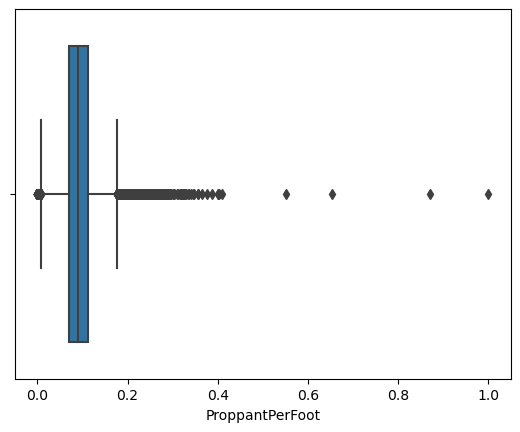

In [45]:
sns.boxplot(df.ProppantPerFoot)

<AxesSubplot:xlabel='ProppantPerFoot', ylabel='Density'>

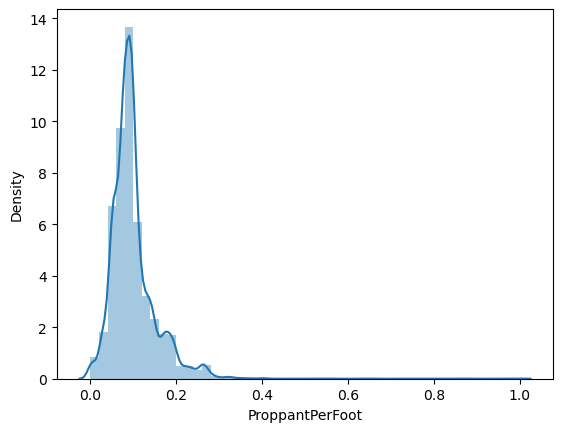

In [46]:
sns.distplot(df.ProppantPerFoot)

In [56]:
# without outliers
outlier_clean("ProppantPerFoot")

<AxesSubplot:xlabel='ProppantPerFoot', ylabel='NormalizedOilEUR'>

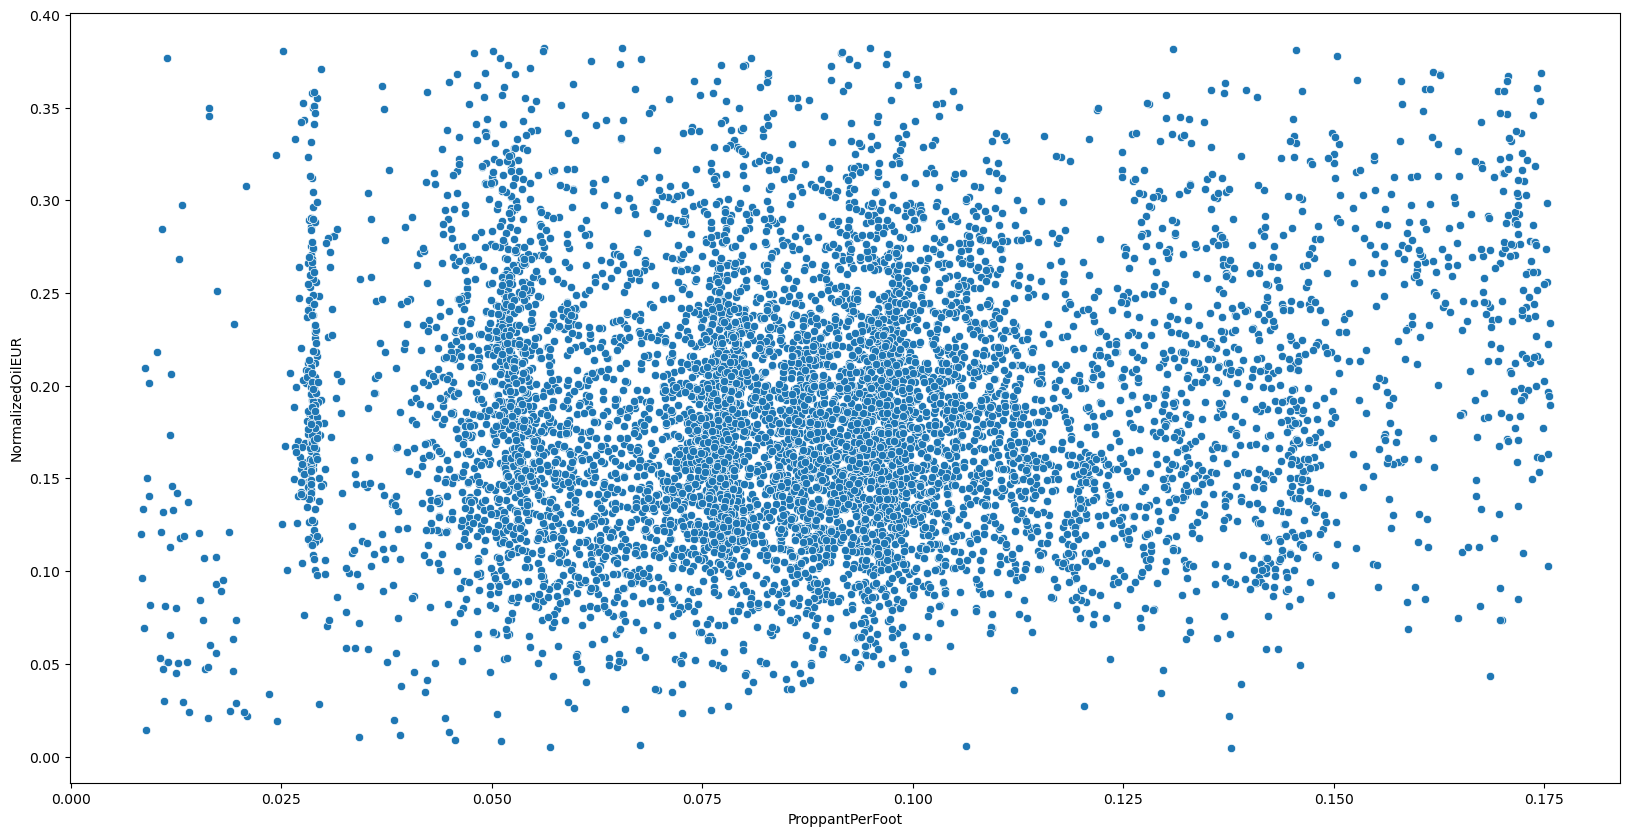

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="ProppantPerFoot", y="NormalizedOilEUR", data=df)

<AxesSubplot:xlabel='ProppantPerFoot', ylabel='NormalizedGasEUR'>

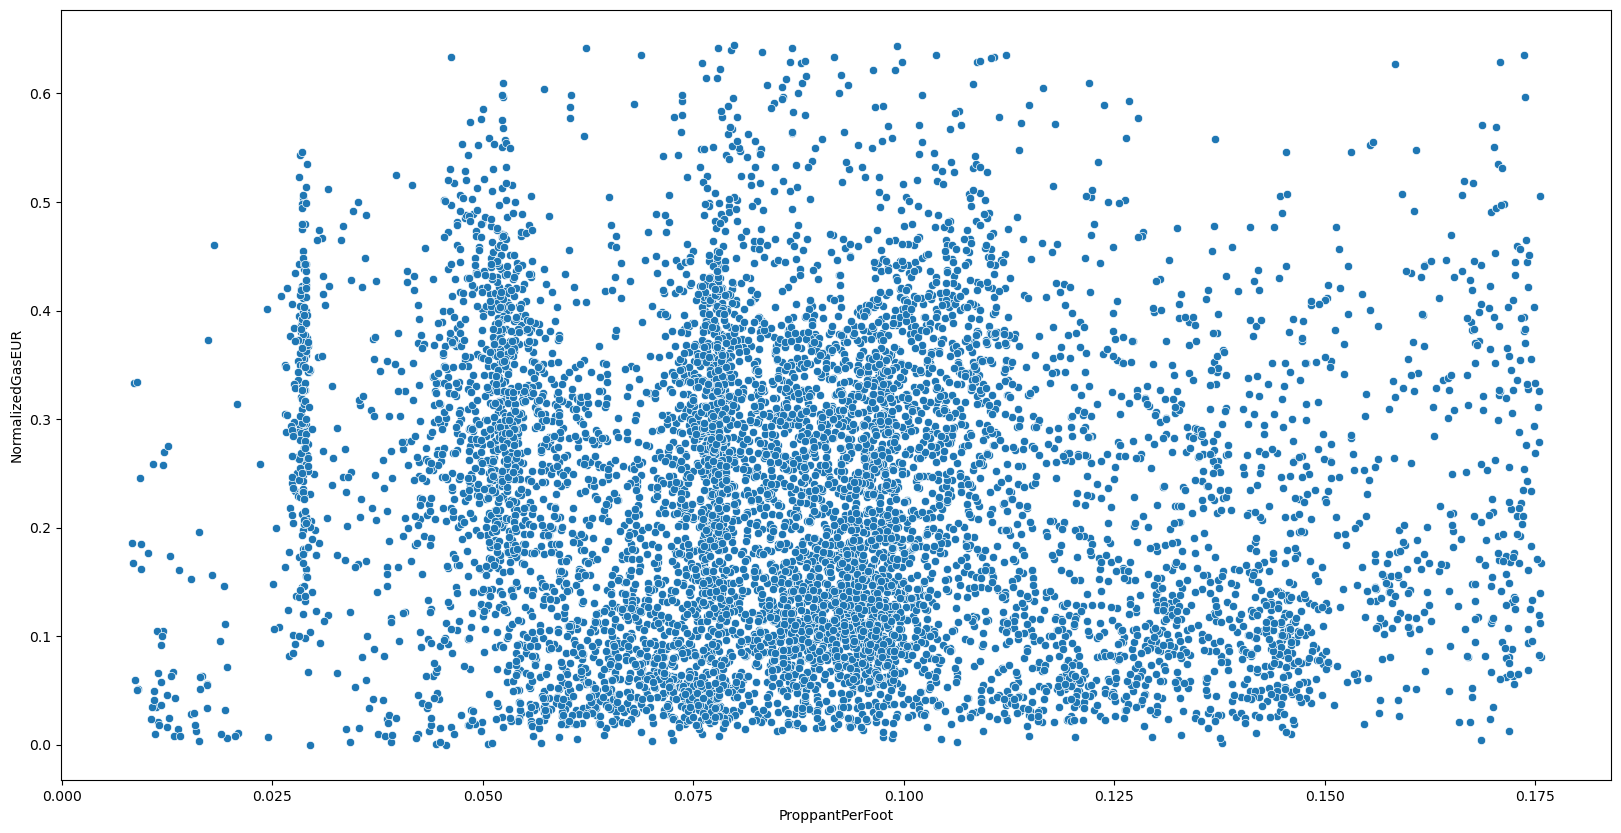

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="ProppantPerFoot", y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between ProppantPerFoot and the NormalizedOilEUR or between ProppantPerFoot and theNormalizedGasEUR. 

#### Let's understand the `FluidPerFoot` feature:

In [59]:
df.describe().FluidPerFoot

count    8942.000000
mean        0.051464
std         0.031280
min         0.000000
25%         0.034960
50%         0.042851
75%         0.059998
max         1.000000
Name: FluidPerFoot, dtype: float64

<AxesSubplot:xlabel='FluidPerFoot'>

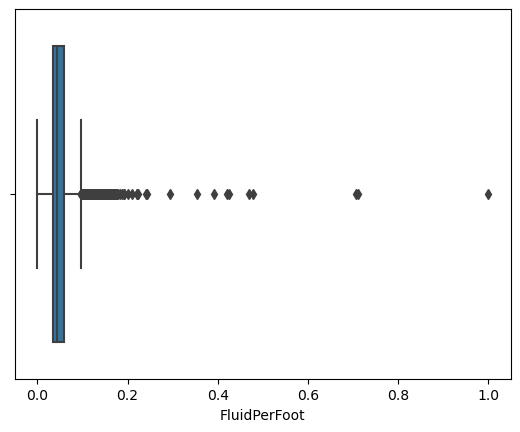

In [60]:
sns.boxplot(df.FluidPerFoot)

<AxesSubplot:xlabel='FluidPerFoot', ylabel='Density'>

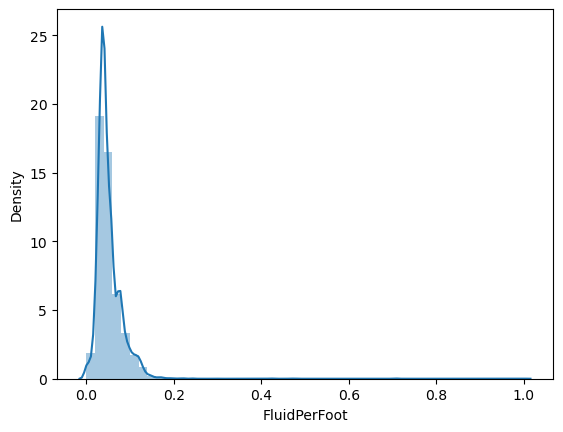

In [61]:
sns.distplot(df.FluidPerFoot)

In [62]:
# without outliers
outlier_clean("FluidPerFoot")

<AxesSubplot:xlabel='FluidPerFoot', ylabel='NormalizedOilEUR'>

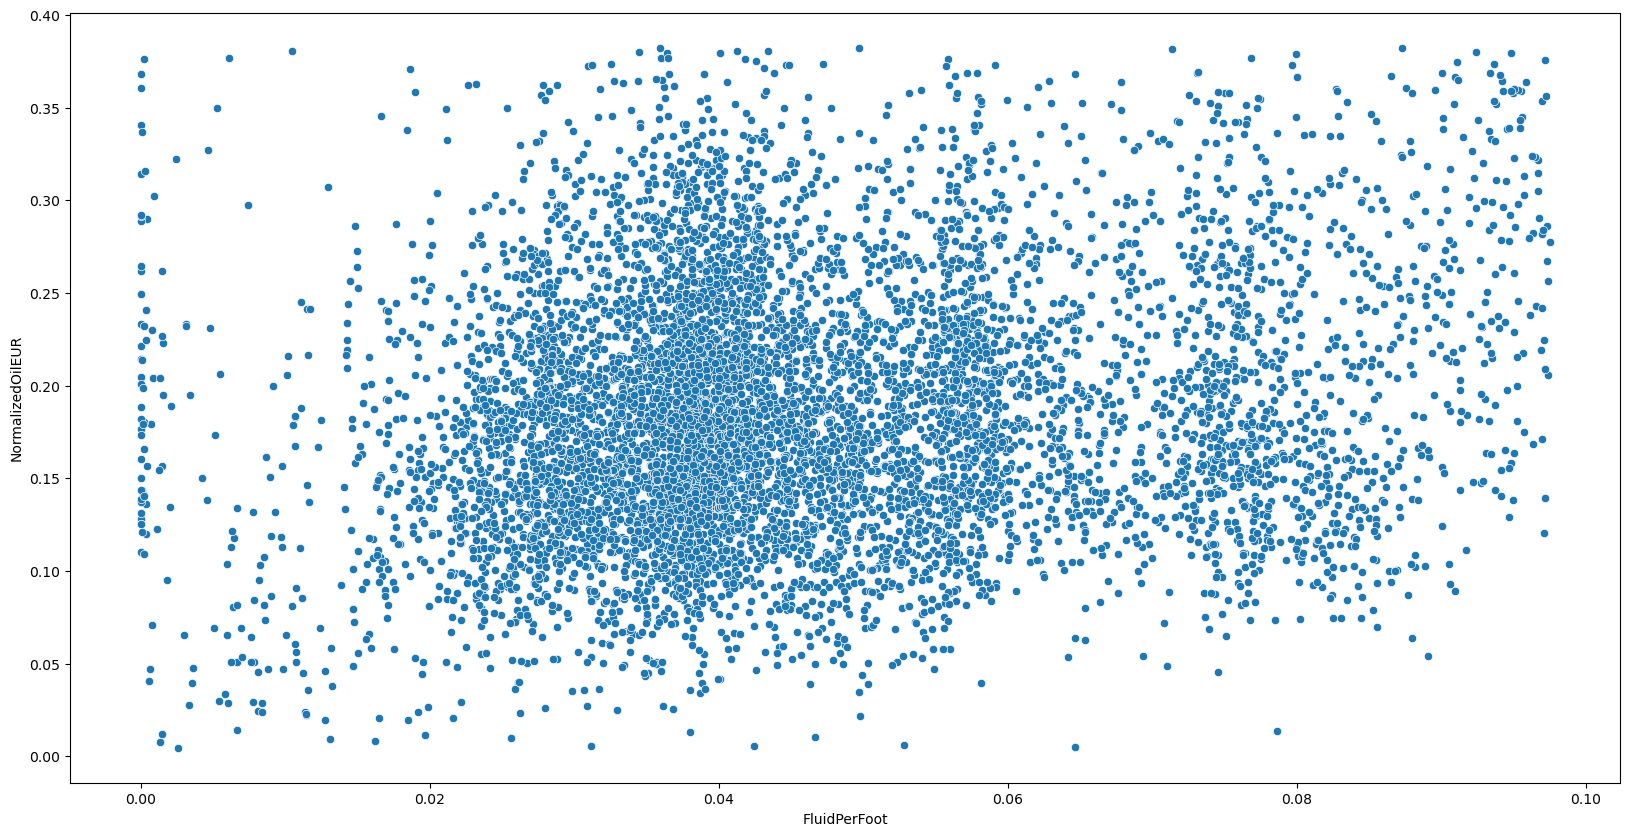

In [66]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="FluidPerFoot", y="NormalizedOilEUR", data=df)

<AxesSubplot:xlabel='FluidPerFoot', ylabel='NormalizedGasEUR'>

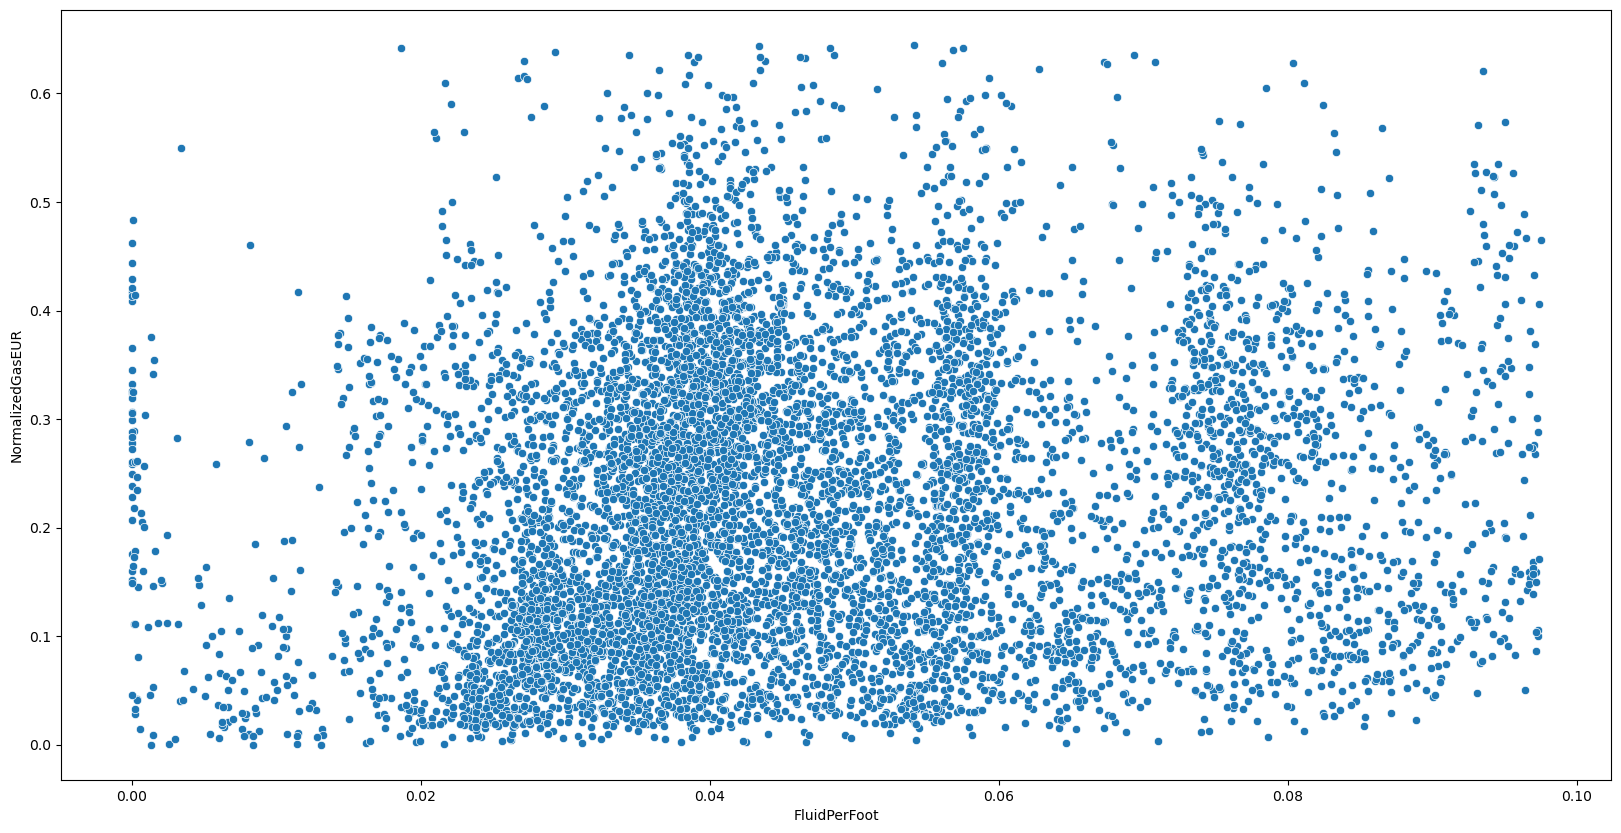

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="FluidPerFoot", y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between FluidPerFoot and the NormalizedOilEUR or between FluidPerFoot and theNormalizedGasEUR. 

#### Let's understand the `LeftDistance` feature:

In [68]:
df.describe().LeftDistance

count    6758.000000
mean        0.161722
std         0.175880
min         0.000000
25%         0.062536
50%         0.109485
75%         0.168742
max         1.000000
Name: LeftDistance, dtype: float64

<AxesSubplot:xlabel='LeftDistance'>

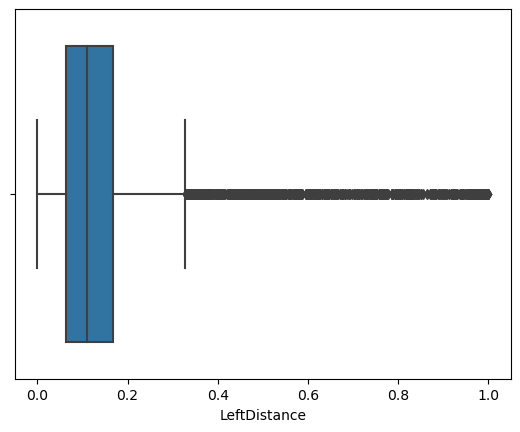

In [69]:
sns.boxplot(df.LeftDistance)

<AxesSubplot:xlabel='LeftDistance', ylabel='Density'>

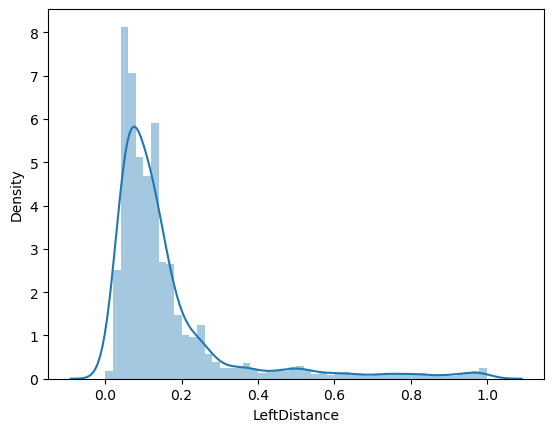

In [70]:
sns.distplot(df.LeftDistance)

In [71]:
# without outliers
outlier_clean("LeftDistance")

<AxesSubplot:xlabel='LeftDistance', ylabel='NormalizedOilEUR'>

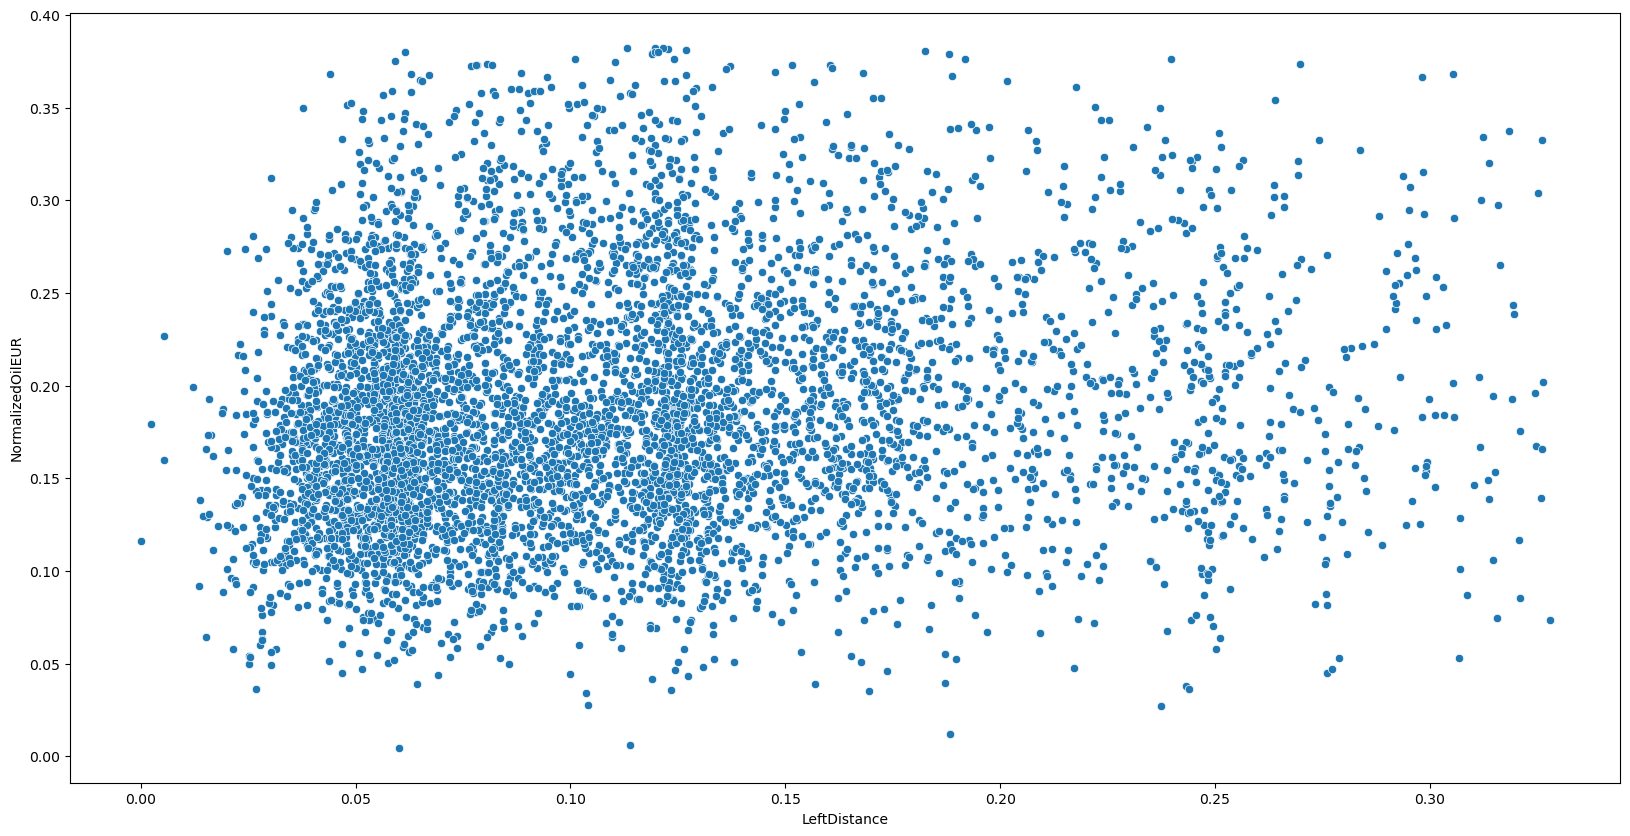

In [72]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df["LeftDistance"], y=df["NormalizedOilEUR"], data=df)

<AxesSubplot:xlabel='LeftDistance', ylabel='NormalizedGasEUR'>

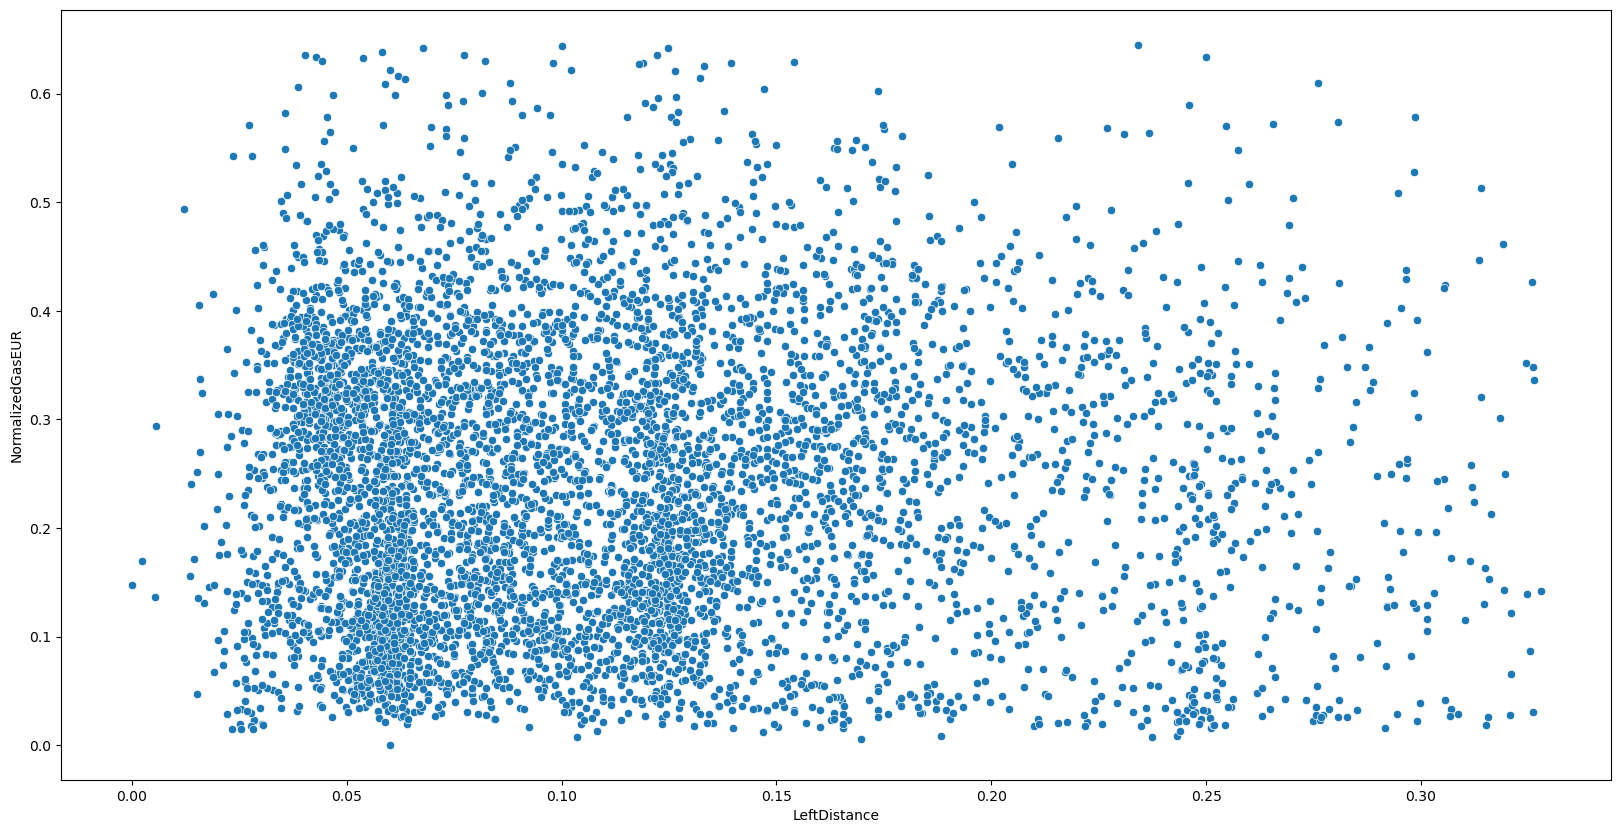

In [73]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="LeftDistance", y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between LeftDistance with NormalizedOilEURor and with NormalizedGasEUR . 

#### Let's understand the `RightDistance` feature:

In [74]:
df.describe().RightDistance

count    6778.000000
mean        0.164190
std         0.180093
min         0.000000
25%         0.062714
50%         0.109654
75%         0.168947
max         1.000000
Name: RightDistance, dtype: float64

<AxesSubplot:xlabel='RightDistance'>

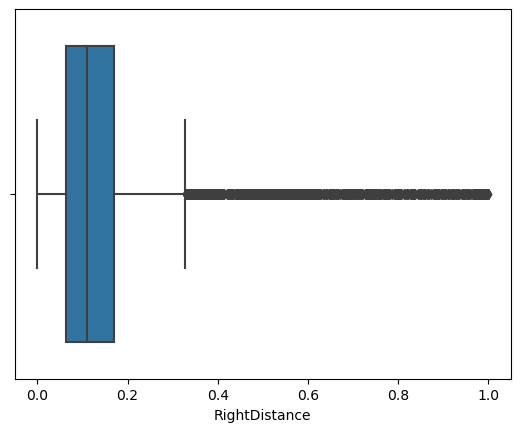

In [75]:
sns.boxplot(df.RightDistance)

<AxesSubplot:xlabel='RightDistance', ylabel='Density'>

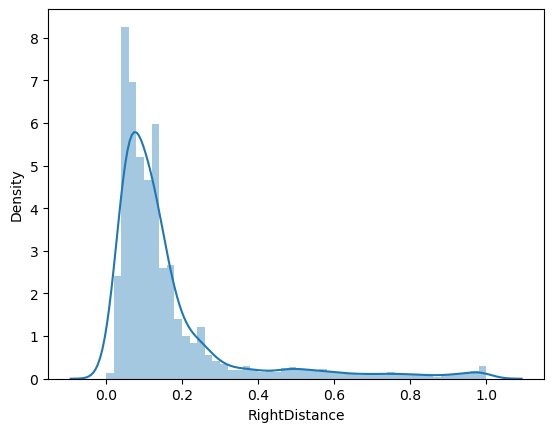

In [76]:
sns.distplot(df.RightDistance)

In [77]:
# without outliers
outlier_clean("RightDistance")

<AxesSubplot:xlabel='RightDistance', ylabel='NormalizedOilEUR'>

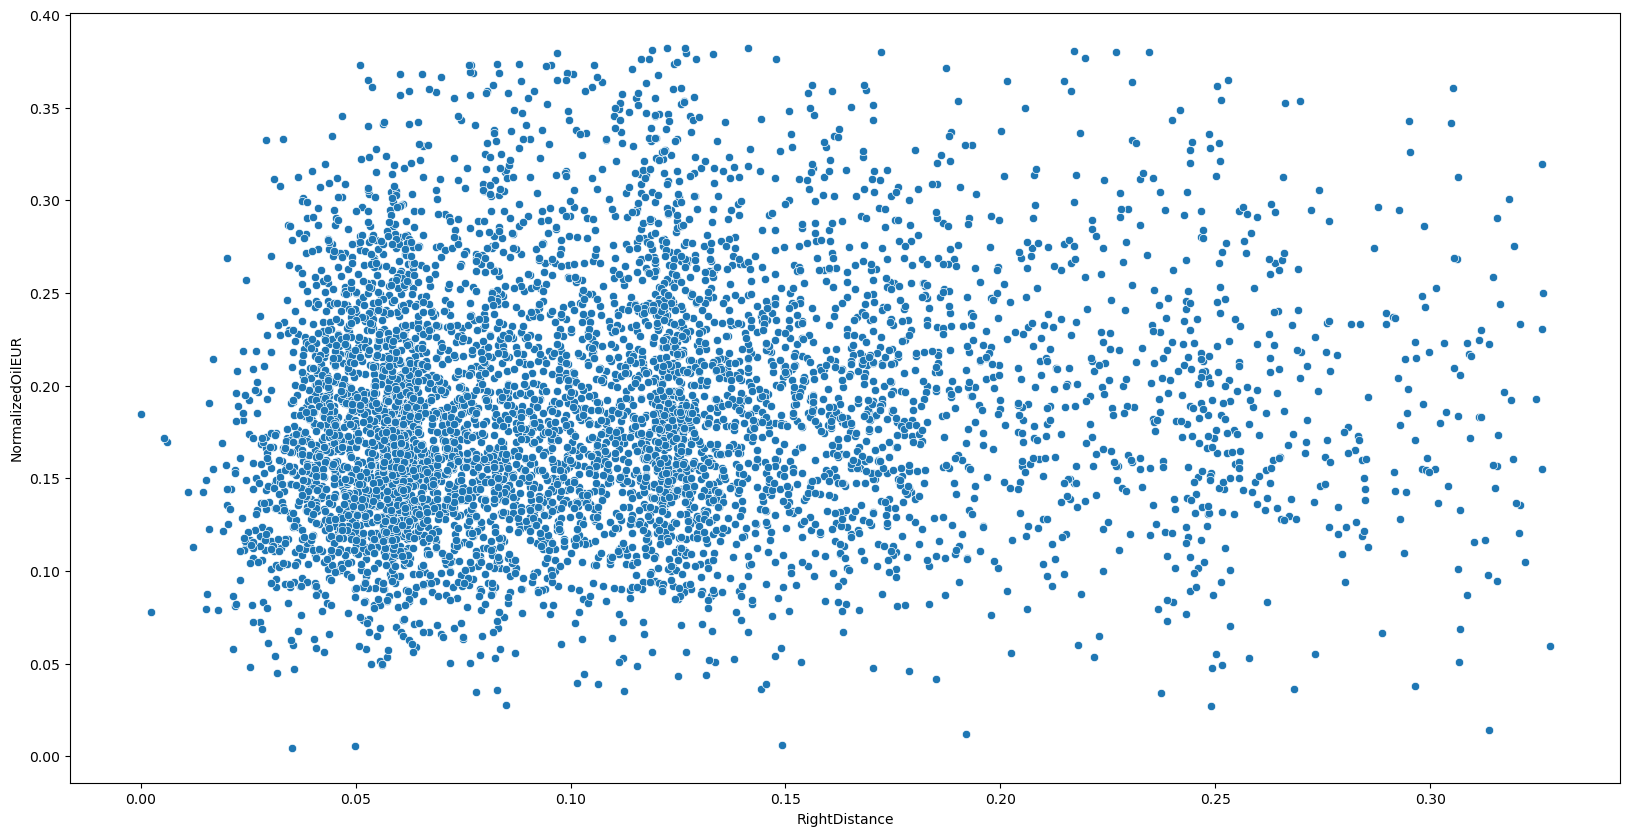

In [78]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="RightDistance", y="NormalizedOilEUR", data=df)

<AxesSubplot:xlabel='RightDistance', ylabel='NormalizedGasEUR'>

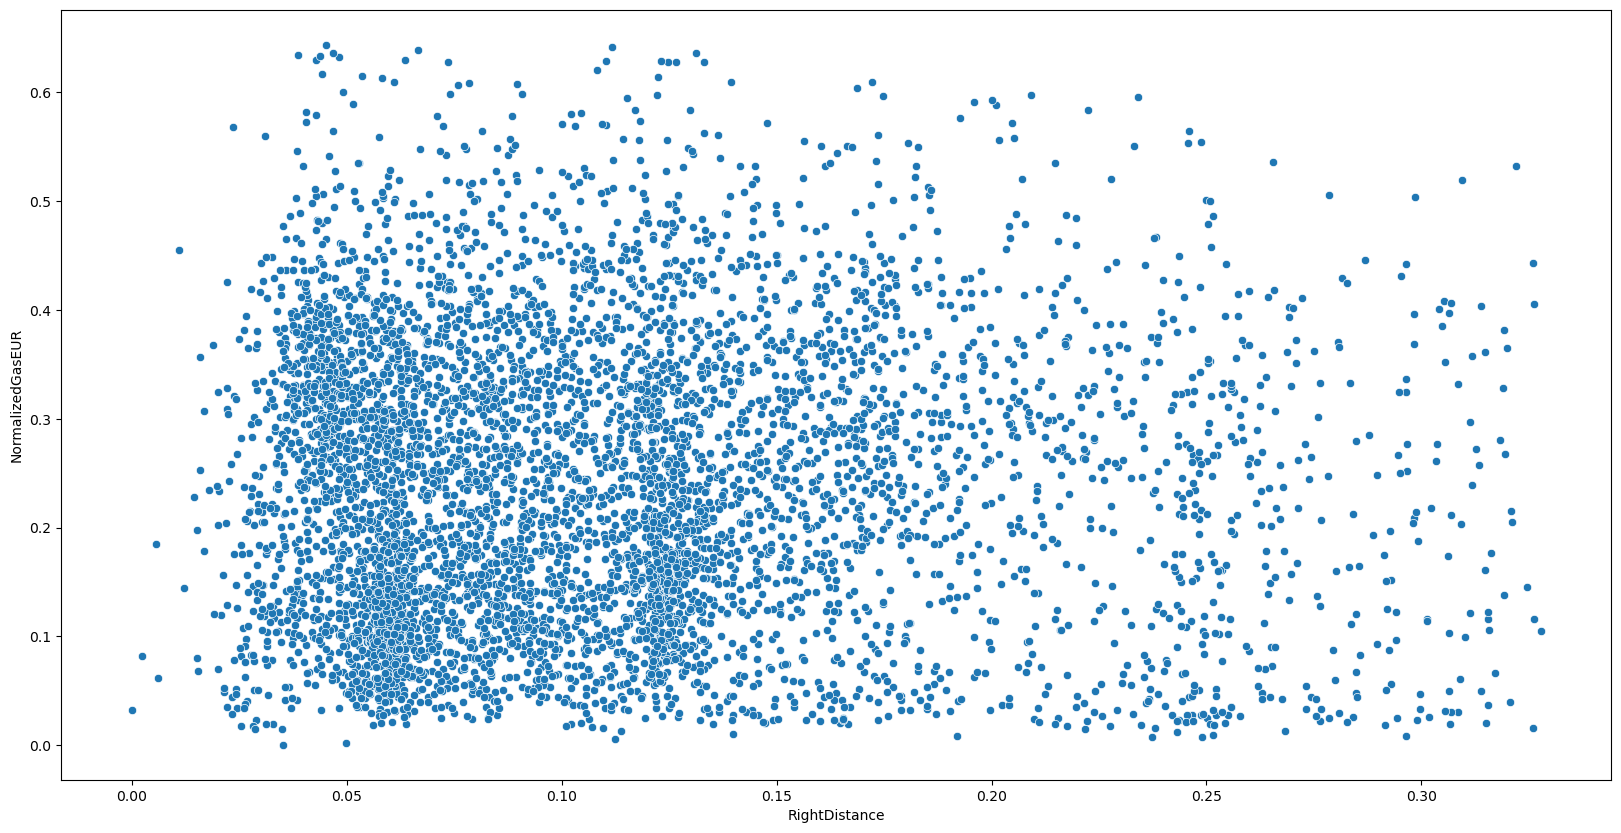

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="RightDistance", y="NormalizedGasEUR", data=df)

- there is **no effect** correlation between RightDistance with NormalizedOilEURor and with NormalizedGasEUR . 

#### Let's understand the `TVD` feature:

In [80]:
df.describe().TVD

count    8893.000000
mean        0.613106
std         0.085866
min         0.000000
25%         0.566616
50%         0.619658
75%         0.659474
max         1.000000
Name: TVD, dtype: float64

<AxesSubplot:xlabel='TVD'>

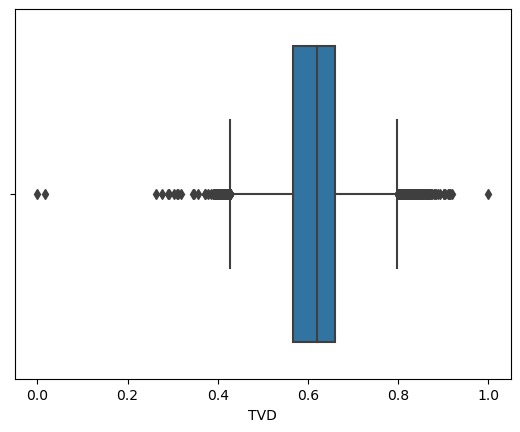

In [81]:
sns.boxplot(df.TVD)

<AxesSubplot:xlabel='TVD', ylabel='Density'>

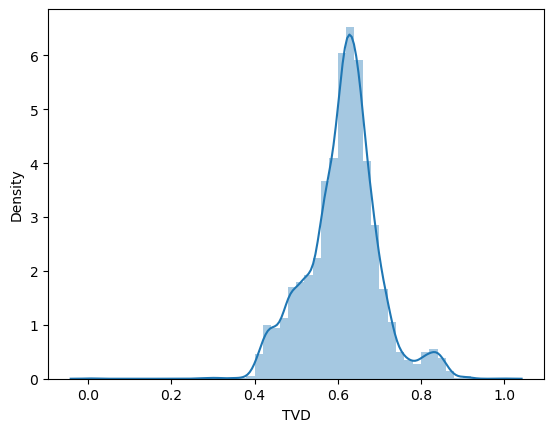

In [82]:
sns.distplot(df.TVD)

In [83]:
# without outliers
outlier_clean("TVD")

<AxesSubplot:xlabel='TVD', ylabel='NormalizedOilEUR'>

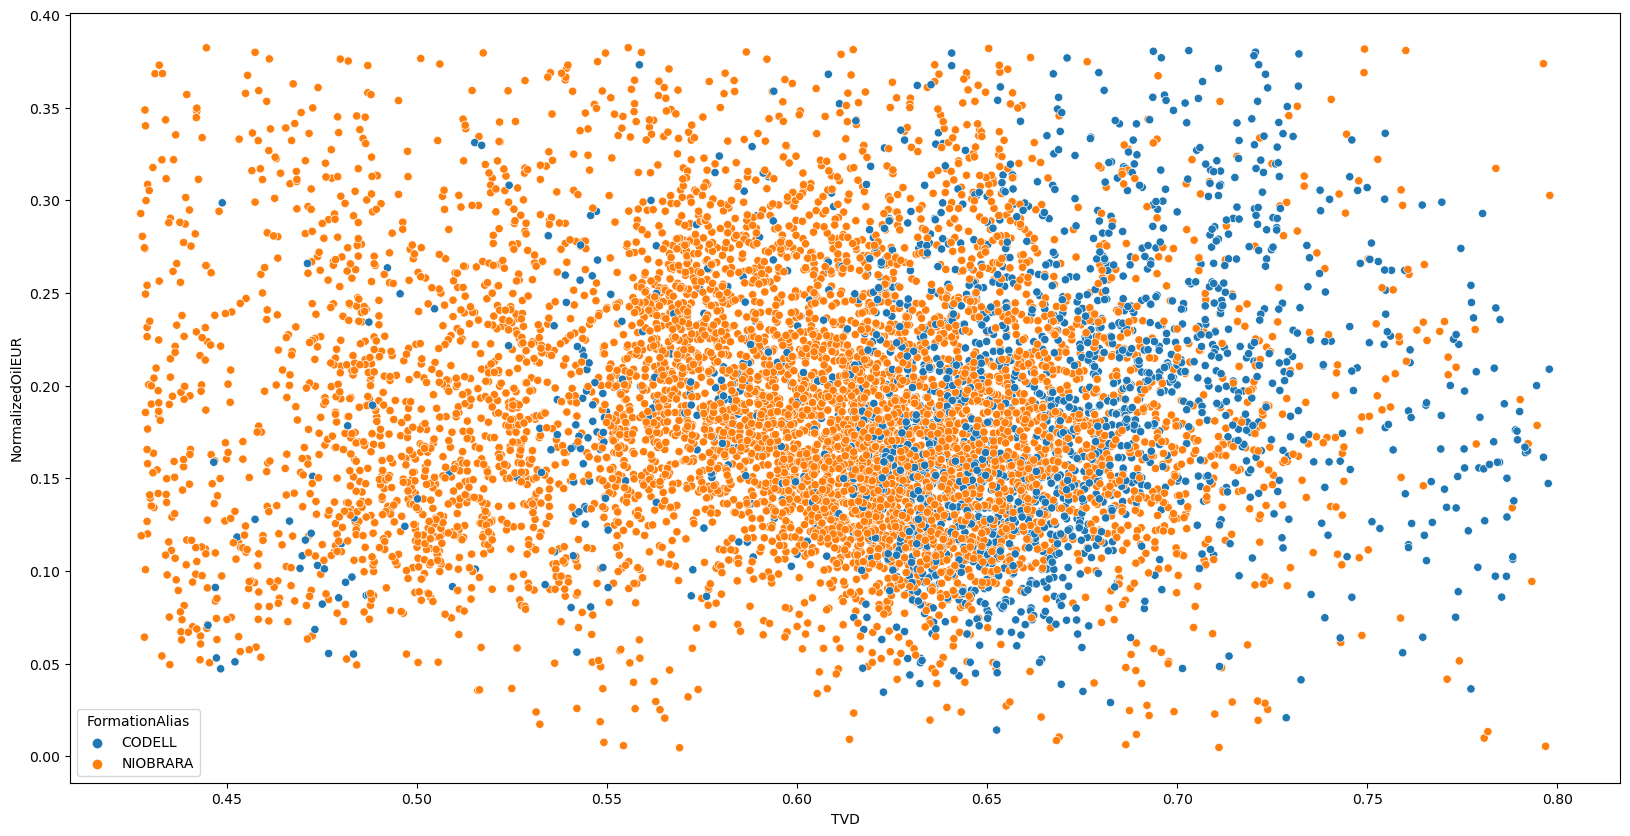

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="TVD", y="NormalizedOilEUR", data=df , hue='FormationAlias')

<AxesSubplot:xlabel='TVD', ylabel='NormalizedGasEUR'>

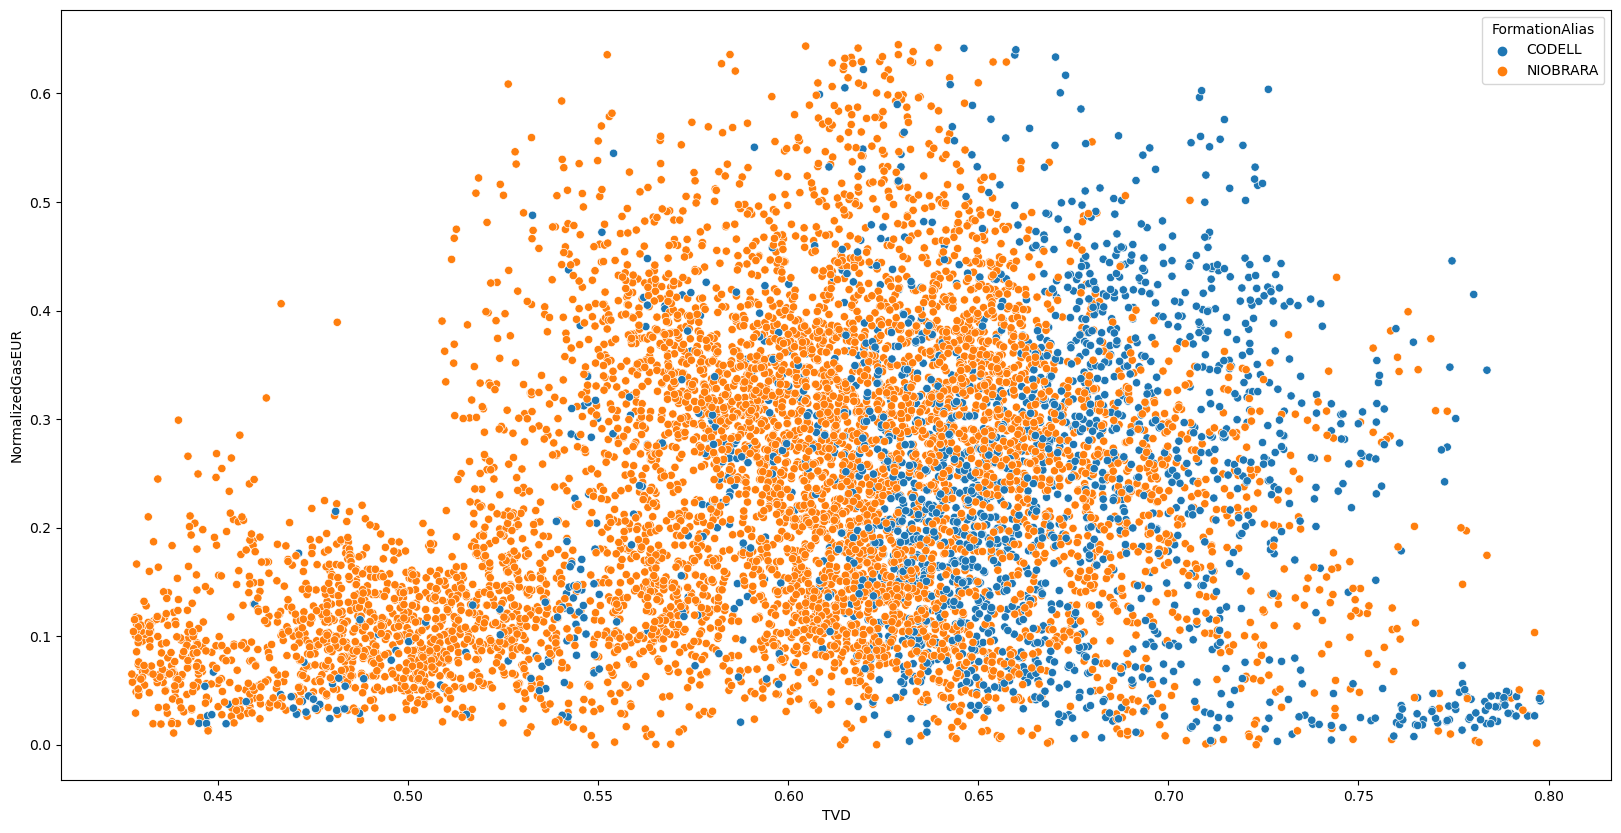

In [85]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="TVD", y="NormalizedGasEUR", data=df , hue='FormationAlias')

- there is **no clear** effect correlation between TVD with NormalizedOilEURor and with NormalizedGasEUR . 

#### Let's understand the `FormationAlias` feature:

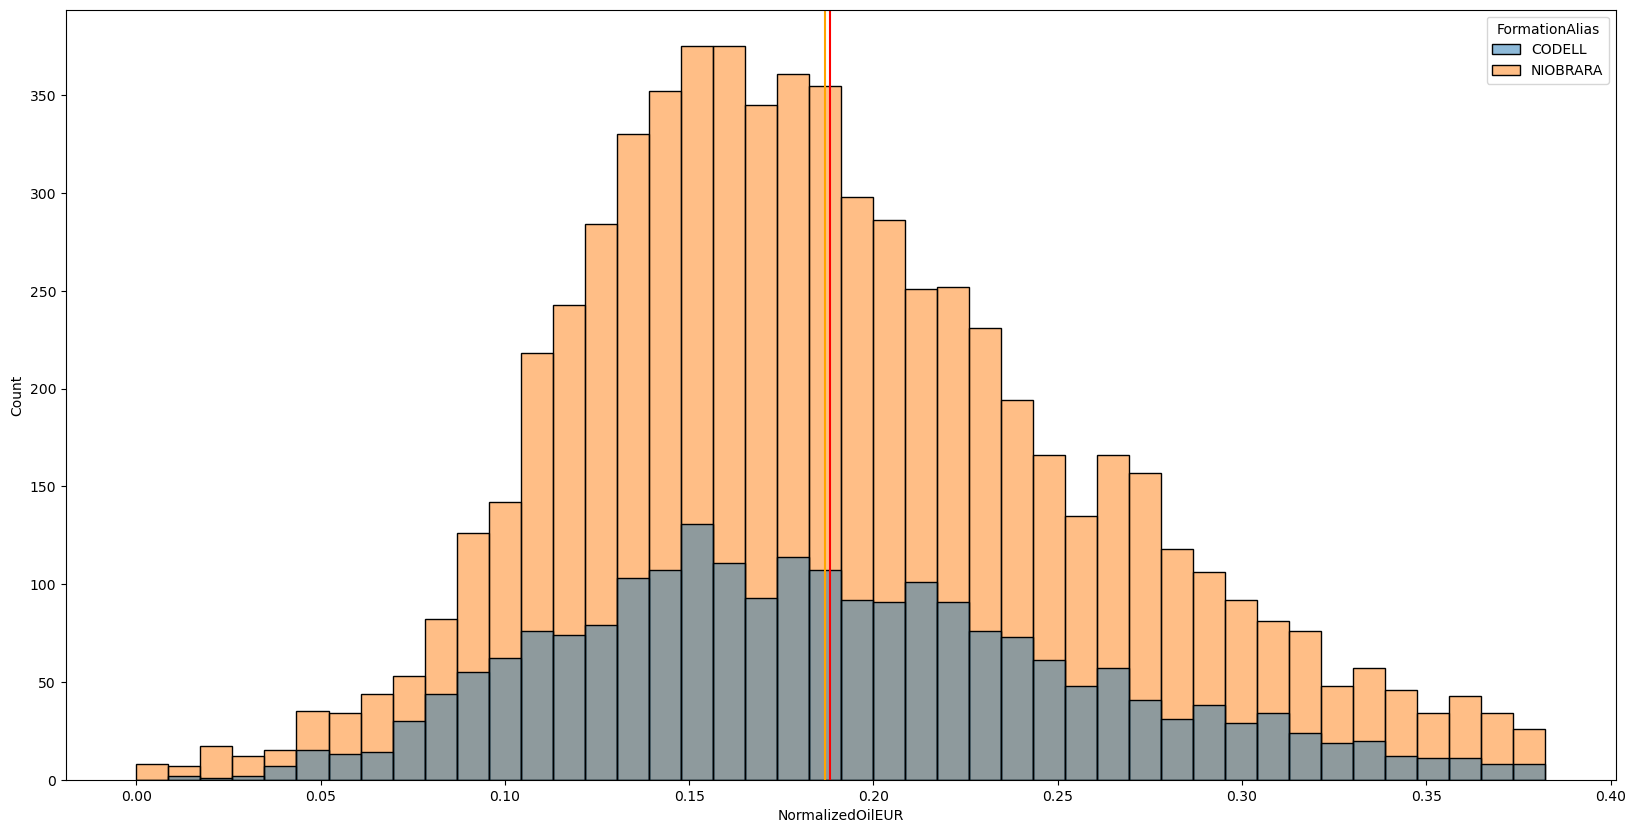

In [86]:
plt.figure(figsize=(20,10))
sns.histplot(x="NormalizedOilEUR", hue='FormationAlias', data=df)
plt.axvline(df.loc[df.FormationAlias == 'NIOBRARA' ,'NormalizedOilEUR'].mean() ,label='NIOBRARA',color='red')
plt.axvline(df.loc[df.FormationAlias == 'CODELL' ,'NormalizedOilEUR'].mean(),label='CODELL',color='orange')

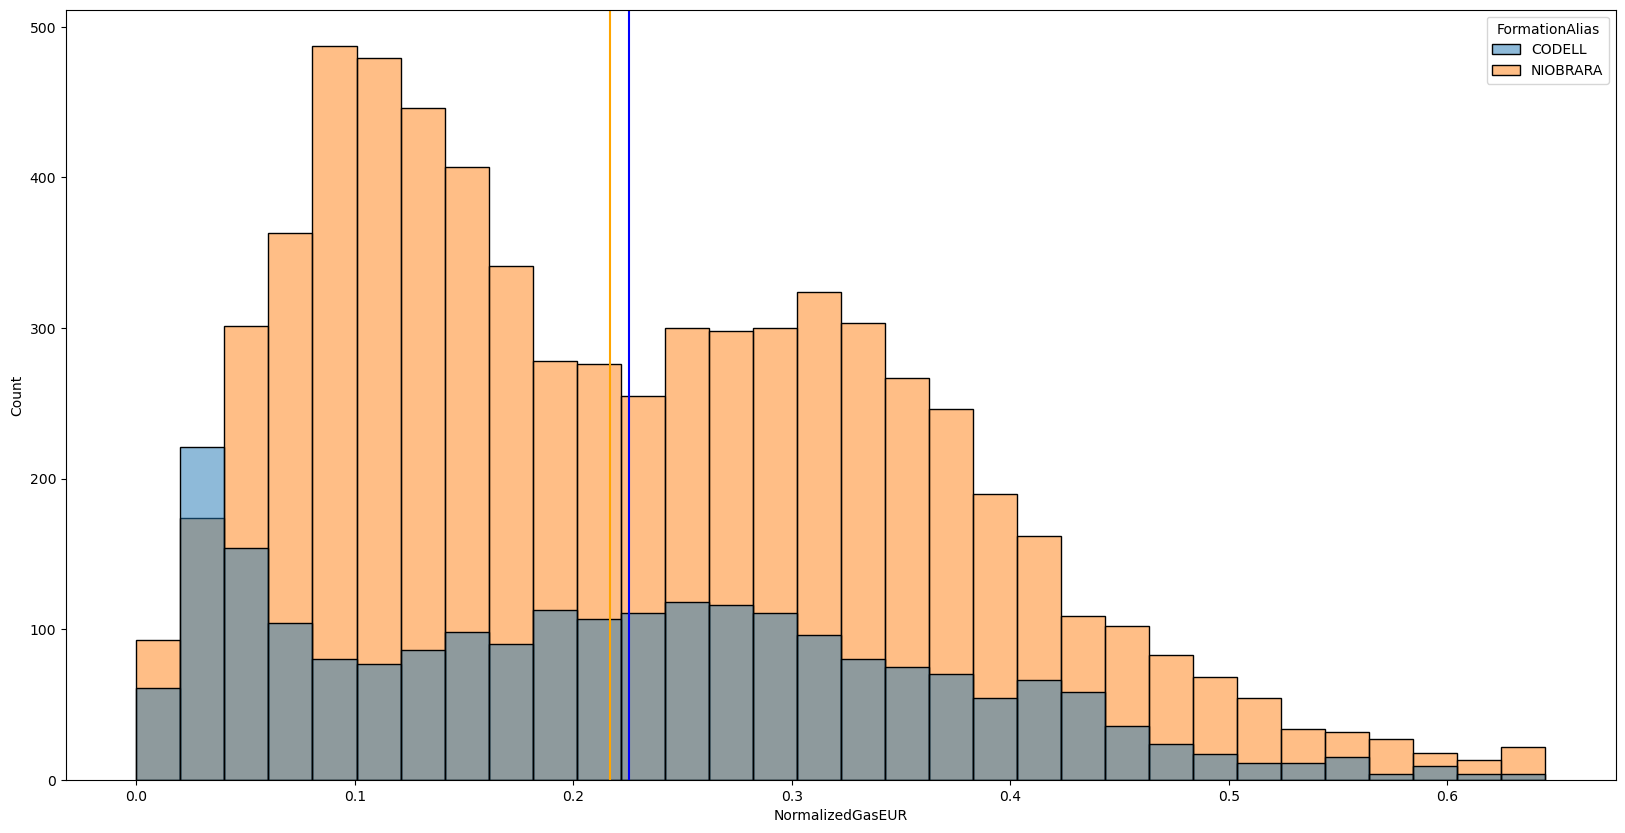

In [87]:
plt.figure(figsize=(20,10))
sns.histplot(x="NormalizedGasEUR", hue='FormationAlias', data=df)
plt.axvline(df.loc[df.FormationAlias == 'NIOBRARA' ,'NormalizedGasEUR'].mean() ,label='NIOBRARA',color='blue')
plt.axvline(df.loc[df.FormationAlias == 'CODELL' ,'NormalizedGasEUR'].mean(),label='CODELL',color='orange')

- there is **no effect** correlation between FormationAlias with NormalizedOilEURor but there is **slight** correlation between FormationAlias with NormalizedGasEUR . 

#### Let's understand the `LeftNeighbourType` feature:

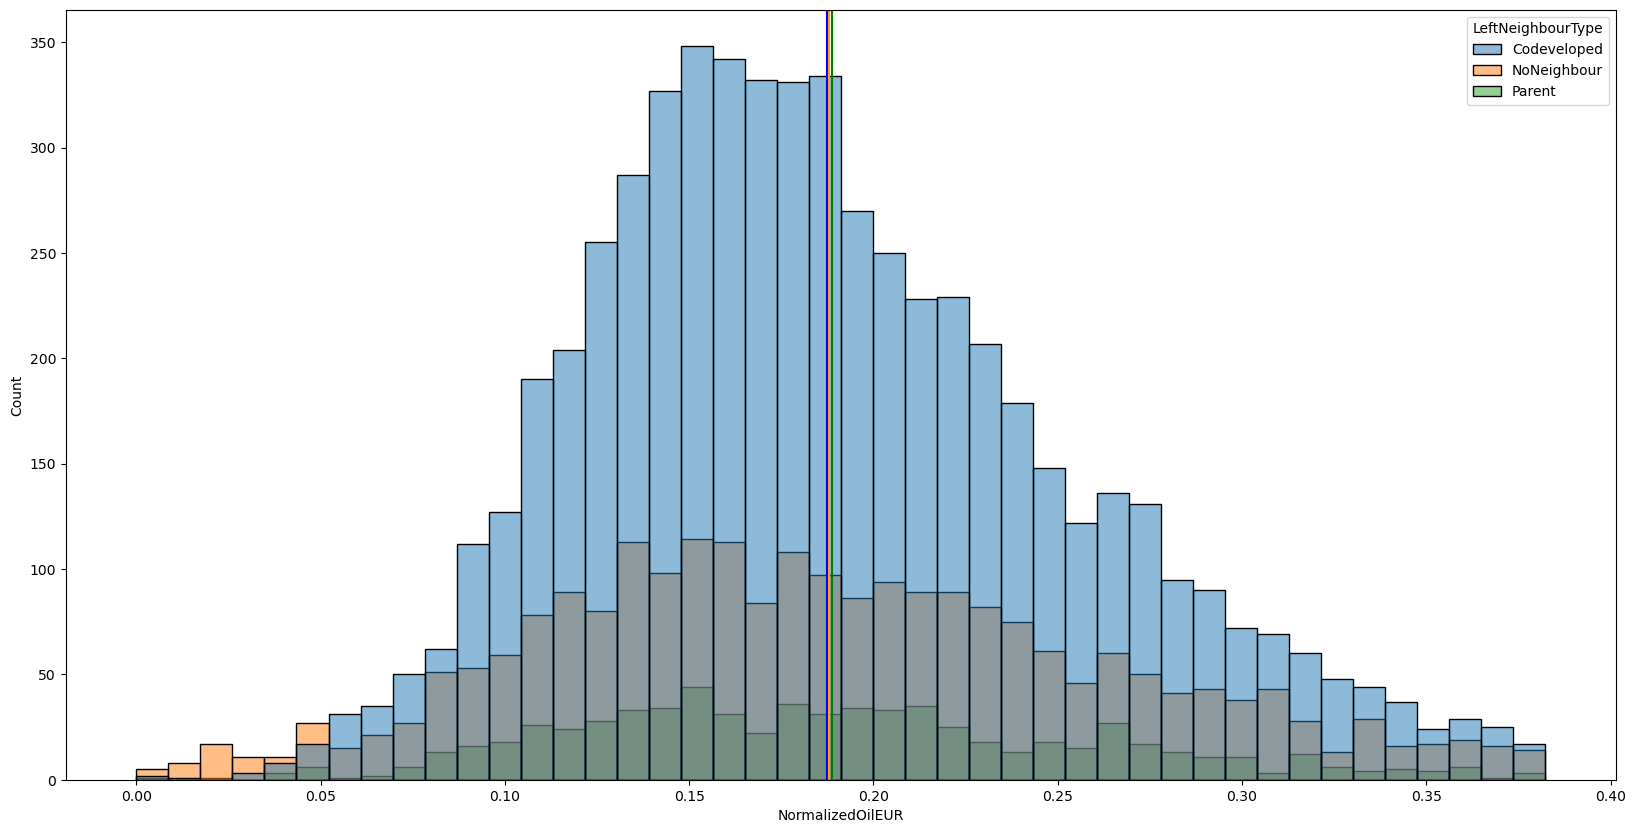

In [88]:
plt.figure(figsize=(20,10))
sns.histplot(x="NormalizedOilEUR", hue='LeftNeighbourType', data=df)
plt.axvline(df.loc[df.LeftNeighbourType == 'NoNeighbour' ,'NormalizedOilEUR'].mean() ,label='NIOBRARA',color='blue')
plt.axvline(df.loc[df.LeftNeighbourType == 'Codeveloped' ,'NormalizedOilEUR'].mean(),label='CODELL',color='orange')
plt.axvline(df.loc[df.LeftNeighbourType == 'Parent' ,'NormalizedOilEUR'].mean(),label='CODELL',color='green')

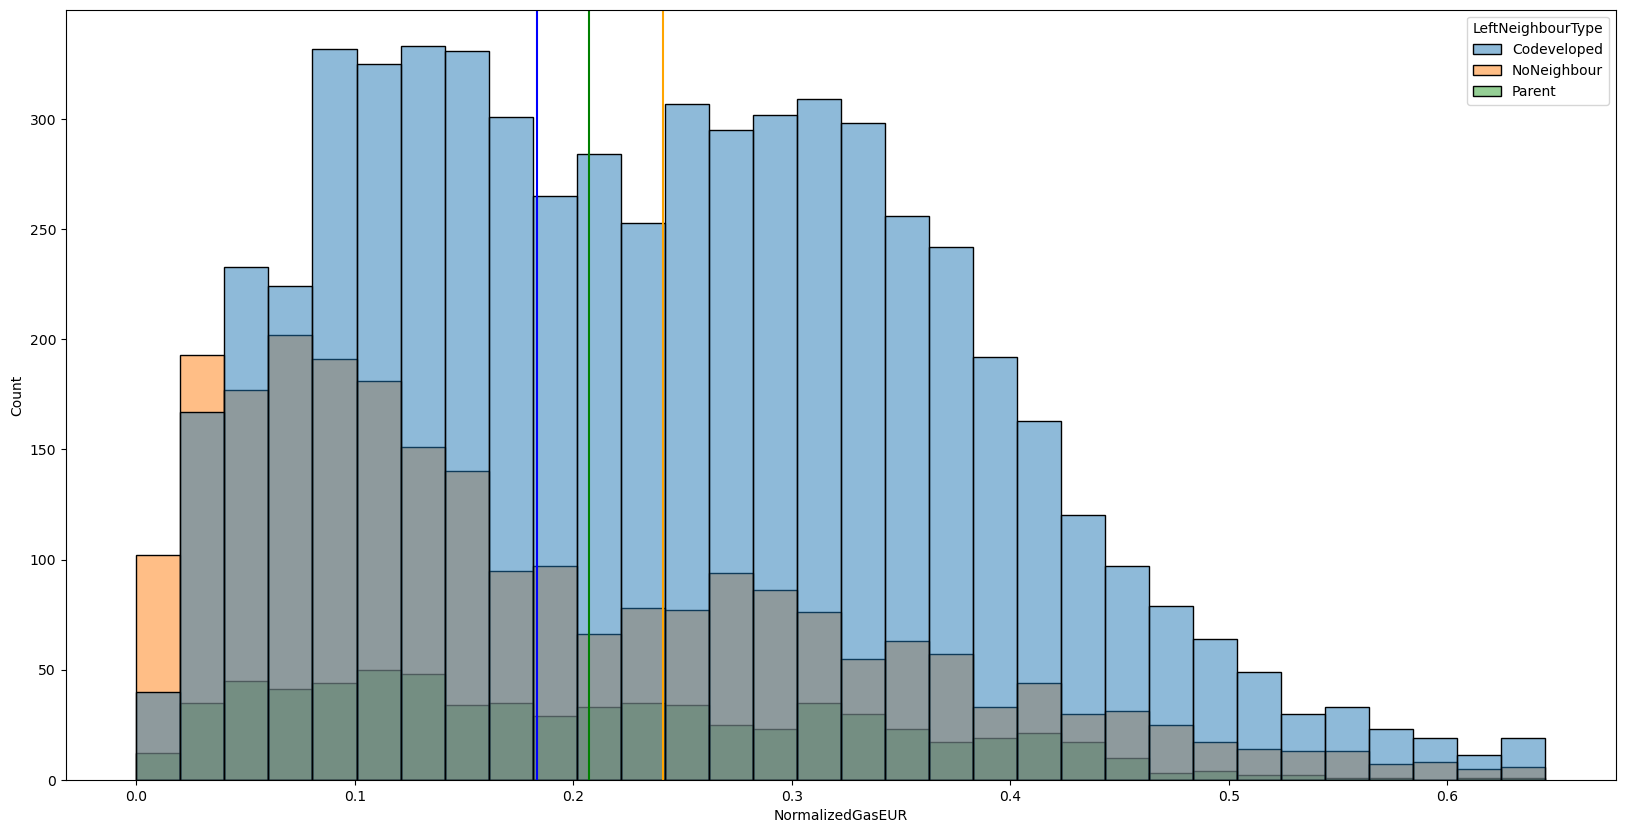

In [89]:
plt.figure(figsize=(20,10))
sns.histplot(x="NormalizedGasEUR", hue='LeftNeighbourType', data=df)
plt.axvline(df.loc[df.LeftNeighbourType == 'NoNeighbour' ,'NormalizedGasEUR'].mean() ,label='NIOBRARA',color='blue')
plt.axvline(df.loc[df.LeftNeighbourType == 'Codeveloped' ,'NormalizedGasEUR'].mean(),label='CODELL',color='orange')
plt.axvline(df.loc[df.LeftNeighbourType == 'Parent' ,'NormalizedGasEUR'].mean(),label='CODELL',color='green')

- there is no effect correlation between LeftNeighbourType with NormalizedOilEURor but there is slight correlation between LeftNeighbourType with NormalizedGasEUR . 

#### Let's understand the `RightNeighbourType` feature:

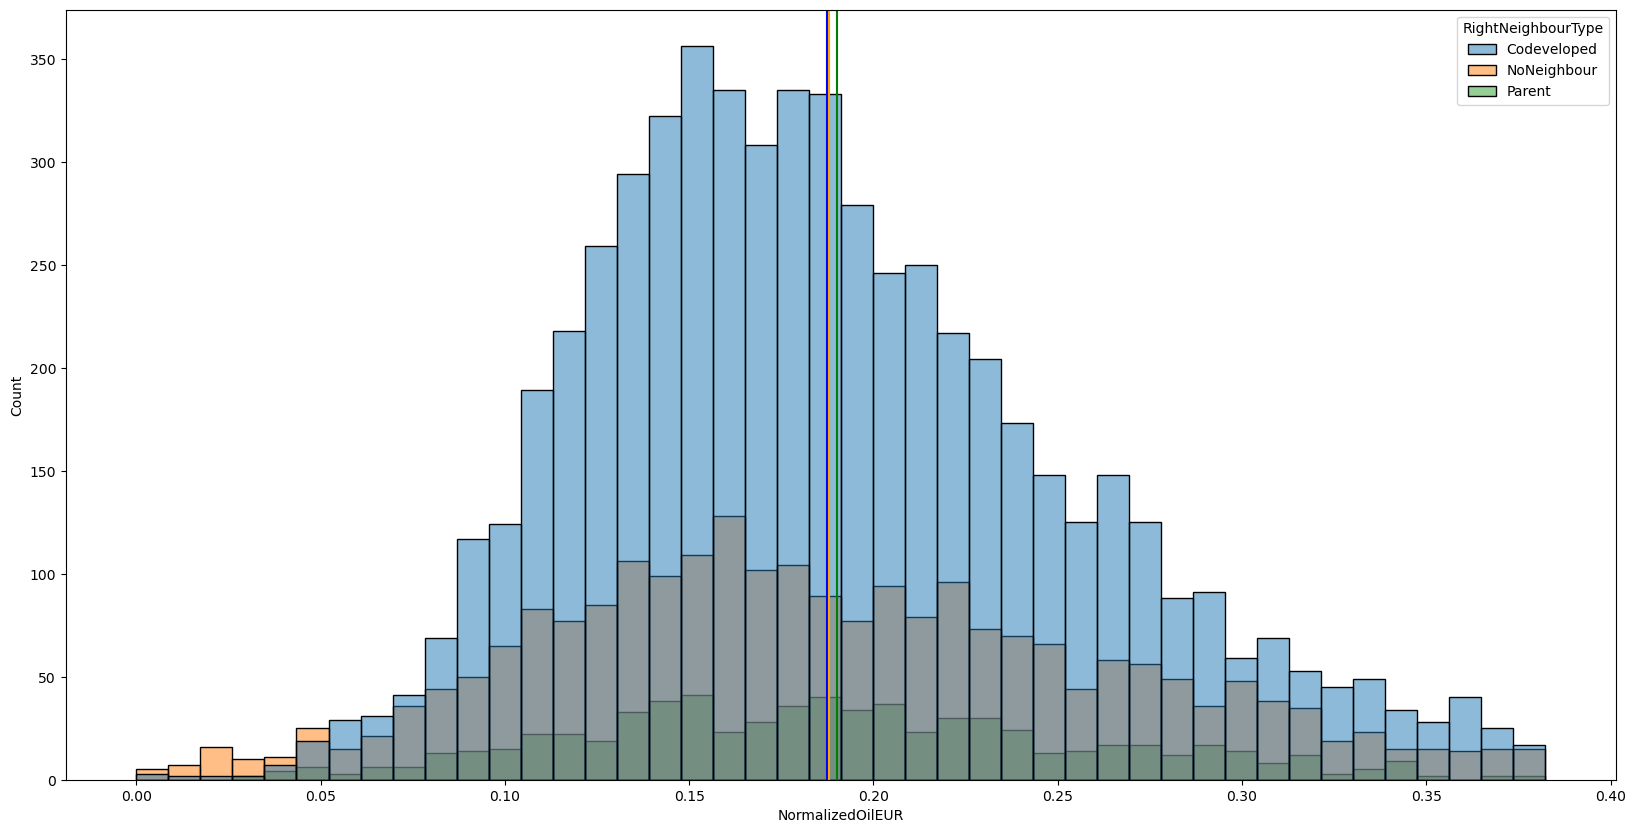

In [90]:
plt.figure(figsize=(20,10))
sns.histplot(x="NormalizedOilEUR", hue='RightNeighbourType', data=df)
plt.axvline(df.loc[df.RightNeighbourType == 'NoNeighbour' ,'NormalizedOilEUR'].mean() ,label='NIOBRARA',color='blue')
plt.axvline(df.loc[df.RightNeighbourType == 'Codeveloped' ,'NormalizedOilEUR'].mean(),label='CODELL',color='orange')
plt.axvline(df.loc[df.RightNeighbourType == 'Parent' ,'NormalizedOilEUR'].mean(),label='CODELL',color='green')

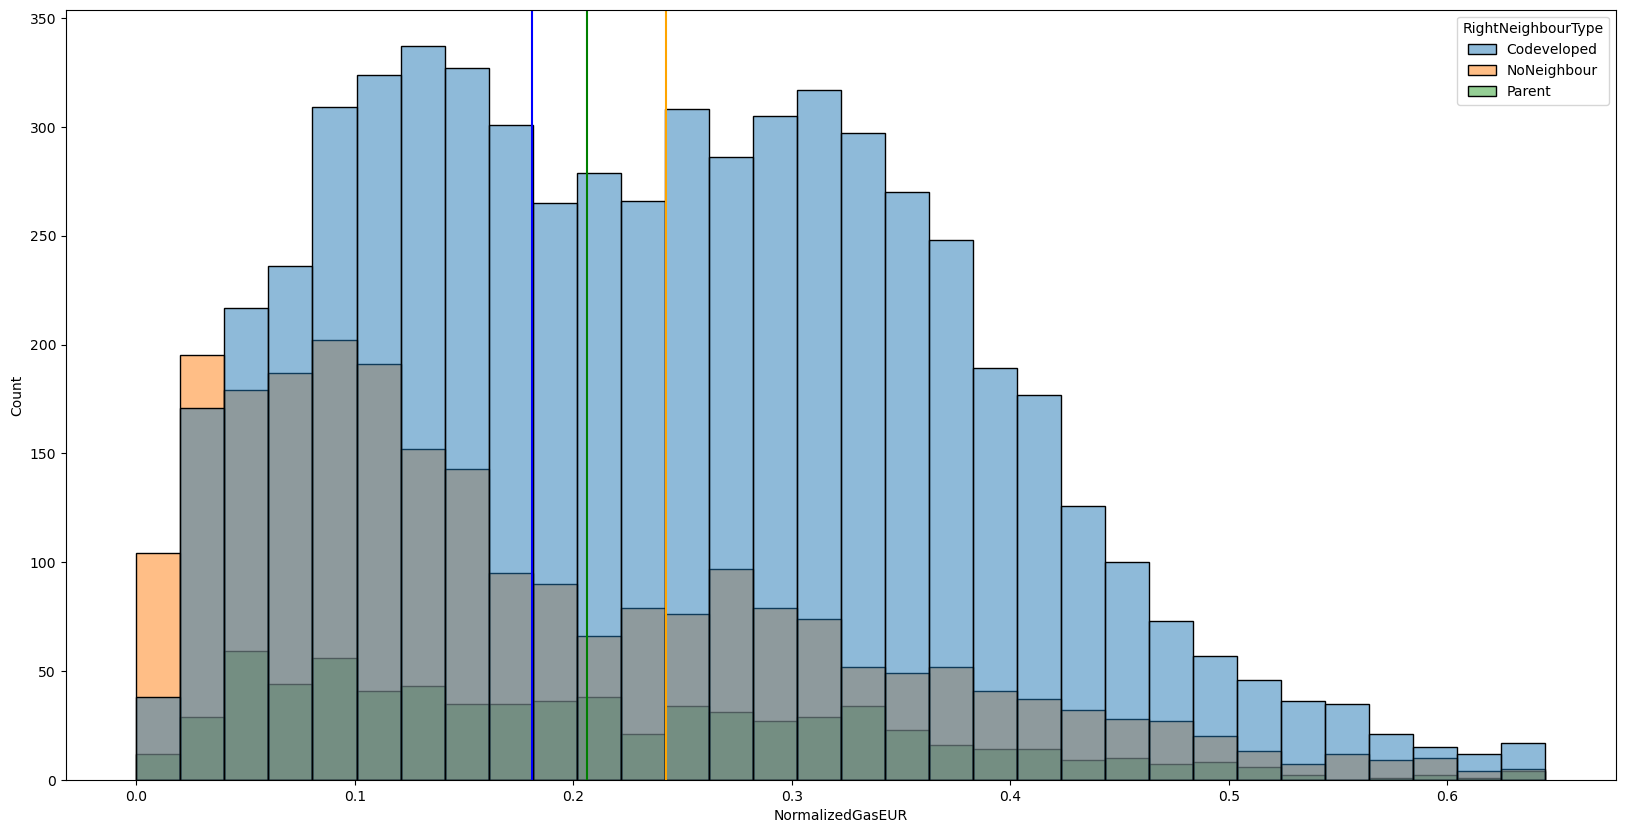

In [91]:
plt.figure(figsize=(20,10))
sns.histplot(x="NormalizedGasEUR", hue='RightNeighbourType', data=df)
plt.axvline(df.loc[df.RightNeighbourType == 'NoNeighbour' ,'NormalizedGasEUR'].mean() ,label='NIOBRARA',color='blue')
plt.axvline(df.loc[df.RightNeighbourType == 'Codeveloped' ,'NormalizedGasEUR'].mean(),label='CODELL',color='orange')
plt.axvline(df.loc[df.RightNeighbourType == 'Parent' ,'NormalizedGasEUR'].mean(),label='CODELL',color='green')

- there is **no effect** correlation between RightNeighbourType with NormalizedOilEURor but there is **slight** correlation between RightNeighbourType with NormalizedGasEUR . 